In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.colors import LinearSegmentedColormap

import statistics as stat
import math
import json

from urllib.request import urlopen
from datetime import datetime, timedelta
from collections import Counter

# Global Level Gathering
The following cell automatically builds the url that is linked to the download page from the [ECDC Website](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). The ECDC updates the file name to match the day that is was most currently updated, so by getting todays date, we can grab the most up to date data from the website. 


In [2]:
time = datetime.now()
date = time.strftime("%Y-%m-%d")
# url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'

mydateparser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y")

df = pd.read_csv(url, parse_dates=['dateRep'], date_parser=mydateparser)
df.head()

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,5.309955
1,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,5.946098
2,2020-07-22,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia,5.606997
3,2020-07-21,21,7,2020,140,5,Afghanistan,AF,AFG,38041757.0,Asia,5.864608
4,2020-07-20,20,7,2020,174,17,Afghanistan,AF,AFG,38041757.0,Asia,6.634814


In [3]:
df = df.drop('Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', axis=1)

In [4]:
# this cell is for adding a value for Spain for today, 
# since they are the only country that doesn't report the latest day on time
# this cell just duplicates their previous days data
today_timestamp = df.dateRep.tolist()[0]
spainData = df[df['countriesAndTerritories']=='Spain']

spainRow = {
    'dateRep': [today_timestamp],
    'day': [today_timestamp.day],
    'month': [today_timestamp.month],
    'year': [today_timestamp.year],
    'cases': [spainData.cases.values[0]],
    'deaths': [spainData.deaths.values[0]],
    'countriesAndTerritories': ['Spain'],
    'geoId': ['ES'],
    'countryterritoryCode': ['ESP'],
    'popData2019': [46937060],
    'continentExp': ['Europe']
}

row_df = pd.DataFrame(data=spainRow)
df = pd.concat([row_df, df], ignore_index=True)

df['cases'] = df['cases'].fillna(0)
df['deaths'] = df['deaths'].fillna(0)

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-07-24,24,7,2020,2615,3,Spain,ES,ESP,46937060.0,Europe
1,2020-07-24,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-07-23,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-07-22,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-07-21,21,7,2020,140,5,Afghanistan,AF,AFG,38041757.0,Asia


In [5]:
#pass a sliced list to determine
def running_sum(a):
  tot = 0
  for item in a:
    tot += item
    yield tot

In [6]:
def total_cases(df, string):
    row = df[string]
    num_list = row.values
    tot = np.cumsum(num_list)
    return tot

In [7]:
def recentNationDate():
    return df['dateRep'][:1].values[0]

In [8]:
#variable definition
countries = df['countriesAndTerritories'].unique().tolist()
interest = ['United_States_of_America', 'Italy', 'China', 'Iran']

In [9]:
#This cell creates a running total value for CASES in each country
frames = []

for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    df_temp = df_temp.iloc[::-1]
#     df_temp['cases'] = df_temp['cases'].fillna(0)
    df_temp['Total Cases'] = total_cases(df_temp, 'cases')
    df_temp = df_temp.iloc[::-1]
    frames.append(df_temp)

df = pd.concat(frames)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Total Cases
0,2020-07-24,24,7,2020,2615,3,Spain,ES,ESP,46937060.0,Europe,272781
27155,2020-07-23,23,7,2020,2615,3,Spain,ES,ESP,46937060.0,Europe,270166
27156,2020-07-22,22,7,2020,1357,2,Spain,ES,ESP,46937060.0,Europe,267551
27157,2020-07-21,21,7,2020,1358,2,Spain,ES,ESP,46937060.0,Europe,266194
27158,2020-07-20,20,7,2020,4581,2,Spain,ES,ESP,46937060.0,Europe,264836


In [10]:
#This cell creates a running total value for DEATHS in each country
frames = []

for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    df_temp = df_temp.iloc[::-1]
#     df_temp['deaths'] = df_temp['deaths'].fillna(0)
    df_temp['Total Deaths'] = total_cases(df_temp, 'deaths')
    df_temp = df_temp.iloc[::-1]
    frames.append(df_temp)

df = pd.concat(frames)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Total Cases,Total Deaths
0,2020-07-24,24,7,2020,2615,3,Spain,ES,ESP,46937060.0,Europe,272781,28432
27155,2020-07-23,23,7,2020,2615,3,Spain,ES,ESP,46937060.0,Europe,270166,28429
27156,2020-07-22,22,7,2020,1357,2,Spain,ES,ESP,46937060.0,Europe,267551,28426
27157,2020-07-21,21,7,2020,1358,2,Spain,ES,ESP,46937060.0,Europe,266194,28424
27158,2020-07-20,20,7,2020,4581,2,Spain,ES,ESP,46937060.0,Europe,264836,28422


In [11]:
#Feature Engineering
df['Cases/1M Pop'] = df['Total Cases']/df['popData2019']*1000000
df['Deaths/1M Pop'] = df['Total Deaths']/df['popData2019']*1000000

df['New Case %']=df['cases']/(df['Total Cases']-df['cases'])*100
df['New Death %']=df['deaths']/(df['Total Deaths']-df['deaths'])*100

df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Total Cases,Total Deaths,Cases/1M Pop,Deaths/1M Pop,New Case %,New Death %
0,2020-07-24,24,7,2020,2615,3,Spain,ES,ESP,46937060.0,Europe,272781,28432,5811.633707,605.747356,0.967923,0.010553
27155,2020-07-23,23,7,2020,2615,3,Spain,ES,ESP,46937060.0,Europe,270166,28429,5755.920801,605.683441,0.977384,0.010554
27156,2020-07-22,22,7,2020,1357,2,Spain,ES,ESP,46937060.0,Europe,267551,28426,5700.207895,605.619525,0.509779,0.007036
27157,2020-07-21,21,7,2020,1358,2,Spain,ES,ESP,46937060.0,Europe,266194,28424,5671.296839,605.576915,0.512770,0.007037
27158,2020-07-20,20,7,2020,4581,2,Spain,ES,ESP,46937060.0,Europe,264836,28422,5642.364477,605.534305,1.760197,0.007037


In [12]:
#add running weekly average for all daily cases for all countries
frames = []

for c in countries:
    df_temp = df[df['countriesAndTerritories']==c]
    df_temp = df_temp.iloc[::-1]
    df_temp['weekly case avg'] = df_temp['cases'].rolling(window=7).mean()
    df_temp['weekly death avg'] = df_temp['deaths'].rolling(window=7).mean()
    
    df_temp['case proportion'] = df_temp['weekly case avg']/(df_temp['weekly case avg'].max())
    df_temp['death proportion'] = df_temp['weekly death avg']/(df_temp['weekly death avg'].max())
    
    df_temp['peak case day'] = df_temp[df_temp['case proportion'] == 1]['dateRep'].iloc[-1]
#     df_temp['peak death day'] = df_temp[df_temp['death proportion'] == 1]['dateRep'].iloc[-1] #how to fix that some countries have 0 deaths
    
    df_temp = df_temp.iloc[::-1]
    
    frames.append(df_temp)

df = pd.concat(frames)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,...,Total Deaths,Cases/1M Pop,Deaths/1M Pop,New Case %,New Death %,weekly case avg,weekly death avg,case proportion,death proportion,peak case day
0,2020-07-24,24,7,2020,2615,3,Spain,ES,ESP,46937060.0,...,28432,5811.633707,605.747356,0.967923,0.010553,1789.428571,1.714286,0.226453,0.001975,2020-03-31
27155,2020-07-23,23,7,2020,2615,3,Spain,ES,ESP,46937060.0,...,28429,5755.920801,605.683441,0.977384,0.010554,1615.857143,1.857143,0.204487,0.002139,2020-03-31
27156,2020-07-22,22,7,2020,1357,2,Spain,ES,ESP,46937060.0,...,28426,5700.207895,605.619525,0.509779,0.007036,1436.714286,1.857143,0.181817,0.002139,2020-03-31
27157,2020-07-21,21,7,2020,1358,2,Spain,ES,ESP,46937060.0,...,28424,5671.296839,605.576915,0.512770,0.007037,1367.857143,2.142857,0.173103,0.002468,2020-03-31
27158,2020-07-20,20,7,2020,4581,2,Spain,ES,ESP,46937060.0,...,28422,5642.364477,605.534305,1.760197,0.007037,1269.000000,2.285714,0.160592,0.002633,2020-03-31


In [13]:
dates = df['peak case day']
df['pcd date'] = dates.apply(lambda x: x.strftime('%m-%d-%Y'))
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,...,Cases/1M Pop,Deaths/1M Pop,New Case %,New Death %,weekly case avg,weekly death avg,case proportion,death proportion,peak case day,pcd date
0,2020-07-24,24,7,2020,2615,3,Spain,ES,ESP,46937060.0,...,5811.633707,605.747356,0.967923,0.010553,1789.428571,1.714286,0.226453,0.001975,2020-03-31,03-31-2020
27155,2020-07-23,23,7,2020,2615,3,Spain,ES,ESP,46937060.0,...,5755.920801,605.683441,0.977384,0.010554,1615.857143,1.857143,0.204487,0.002139,2020-03-31,03-31-2020
27156,2020-07-22,22,7,2020,1357,2,Spain,ES,ESP,46937060.0,...,5700.207895,605.619525,0.509779,0.007036,1436.714286,1.857143,0.181817,0.002139,2020-03-31,03-31-2020
27157,2020-07-21,21,7,2020,1358,2,Spain,ES,ESP,46937060.0,...,5671.296839,605.576915,0.512770,0.007037,1367.857143,2.142857,0.173103,0.002468,2020-03-31,03-31-2020
27158,2020-07-20,20,7,2020,4581,2,Spain,ES,ESP,46937060.0,...,5642.364477,605.534305,1.760197,0.007037,1269.000000,2.285714,0.160592,0.002633,2020-03-31,03-31-2020


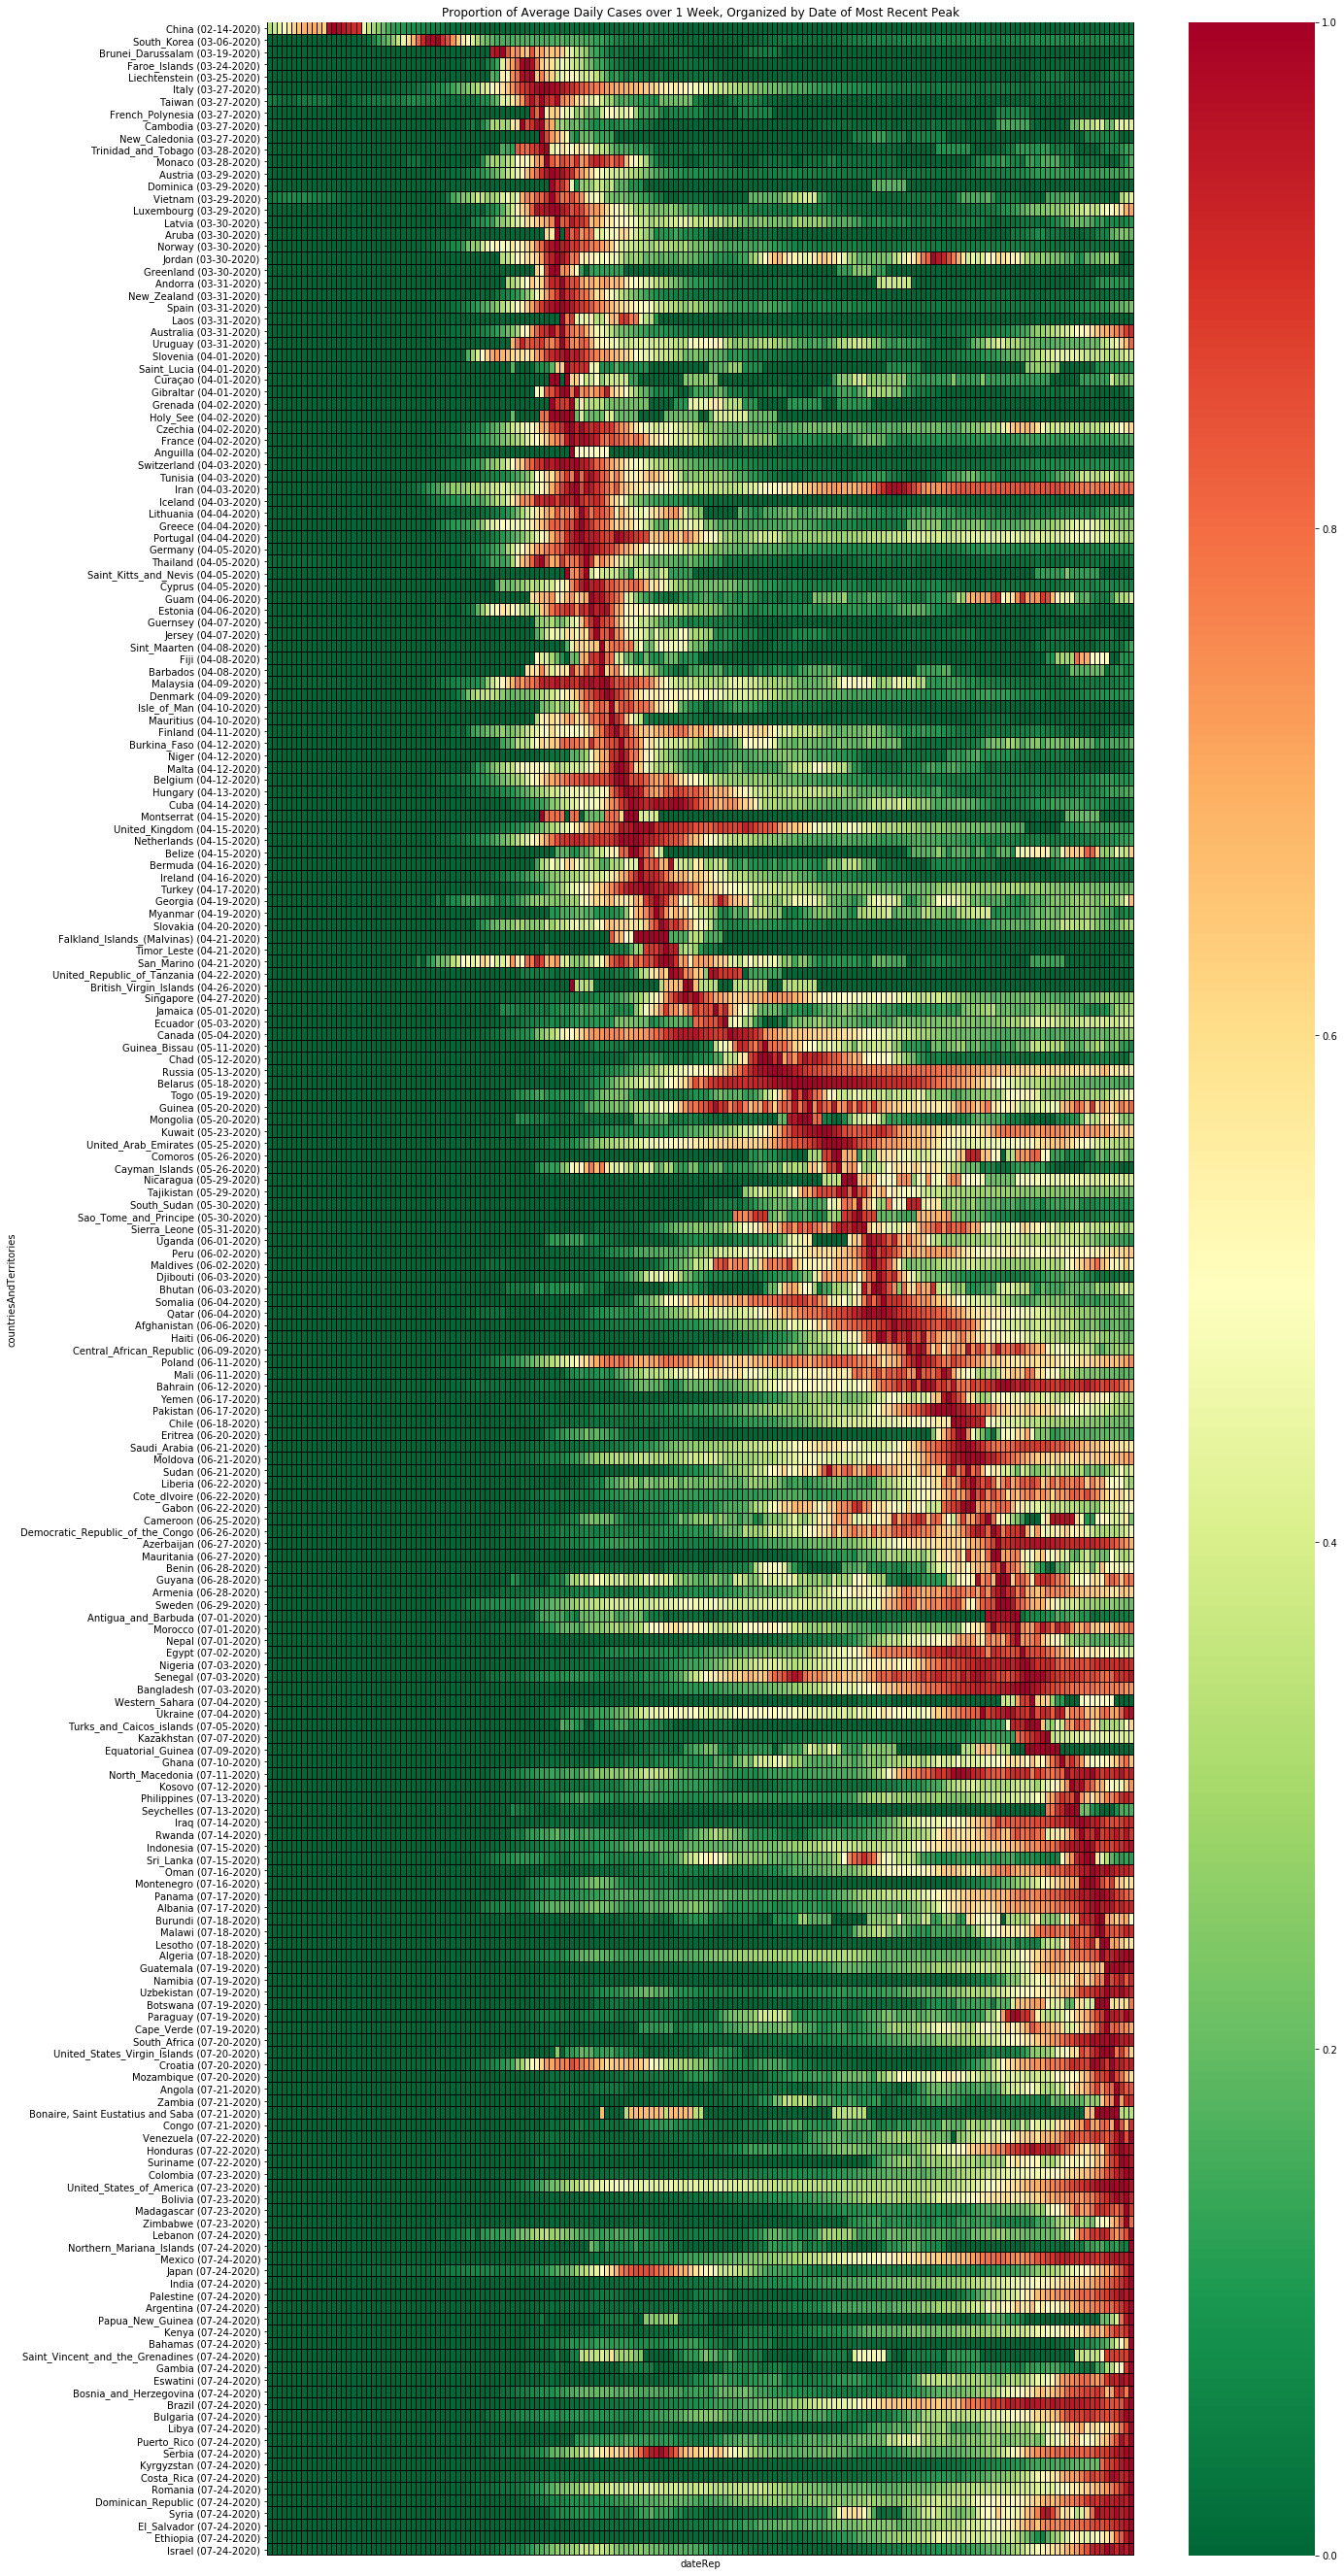

In [14]:
df1 = df.copy()
df1['countriesAndTerritories'] = df1['countriesAndTerritories']+' ('+df1['pcd date']+')'
df1.head()

val = df1[df1['dateRep']==recentNationDate()].sort_values(by=['countriesAndTerritories'])[['peak case day']]
count_list = np.concatenate(df1[df1['dateRep']==recentNationDate()].sort_values(by=['peak case day'])[['countriesAndTerritories']].values.tolist(), axis=0)

df1 = df1[df1['dateRep'] >= datetime(2020,2,1)]

nat_heat = df1.pivot('countriesAndTerritories', 'dateRep', 'case proportion')
nat_heat = nat_heat.loc[count_list]

nat_heat['peak case day'] = val

nat_heat = nat_heat.sort_values(by='peak case day')
nat_heat = nat_heat.drop(['peak case day'], axis=1)
nat_heat = nat_heat.fillna(0)

dayLabels = df1[df1['countriesAndTerritories']=='China']['dateRep'][::-1]
lastLabels = []
for day in dayLabels:
    if day.date().day == 1:
        lastLabels.append(day.date())
    else:
        lastLabels.append('')

fig, ax = plt.subplots(figsize=(20,48))
sns.heatmap(nat_heat, cmap='RdYlGn_r', vmin=0, vmax=1, xticklabels=lastLabels, linewidths=.005, linecolor='black')
plt.title('Proportion of Average Daily Cases over 1 Week, Organized by Date of Most Recent Peak')

fig.savefig('images/Normalized Weekly Average of Daily Cases (National)')

Done: Europe
Done: Asia
Done: Africa
Done: America
Done: Oceania


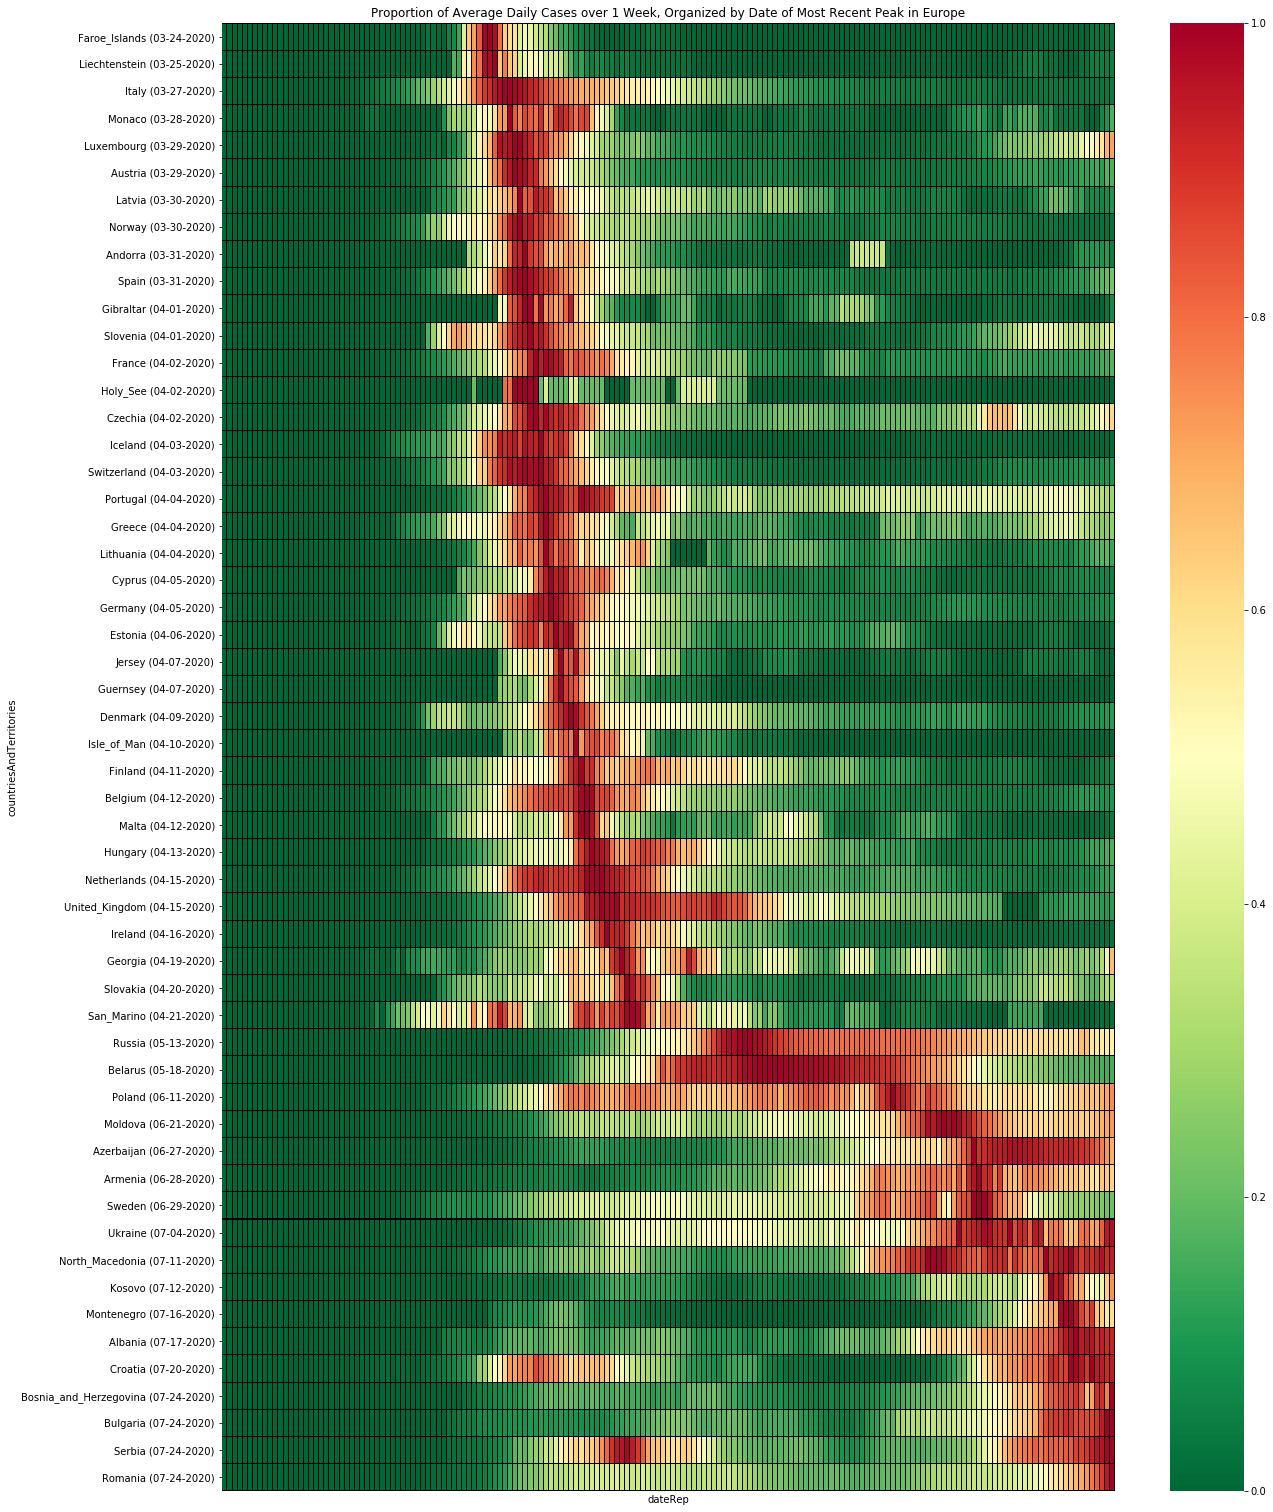

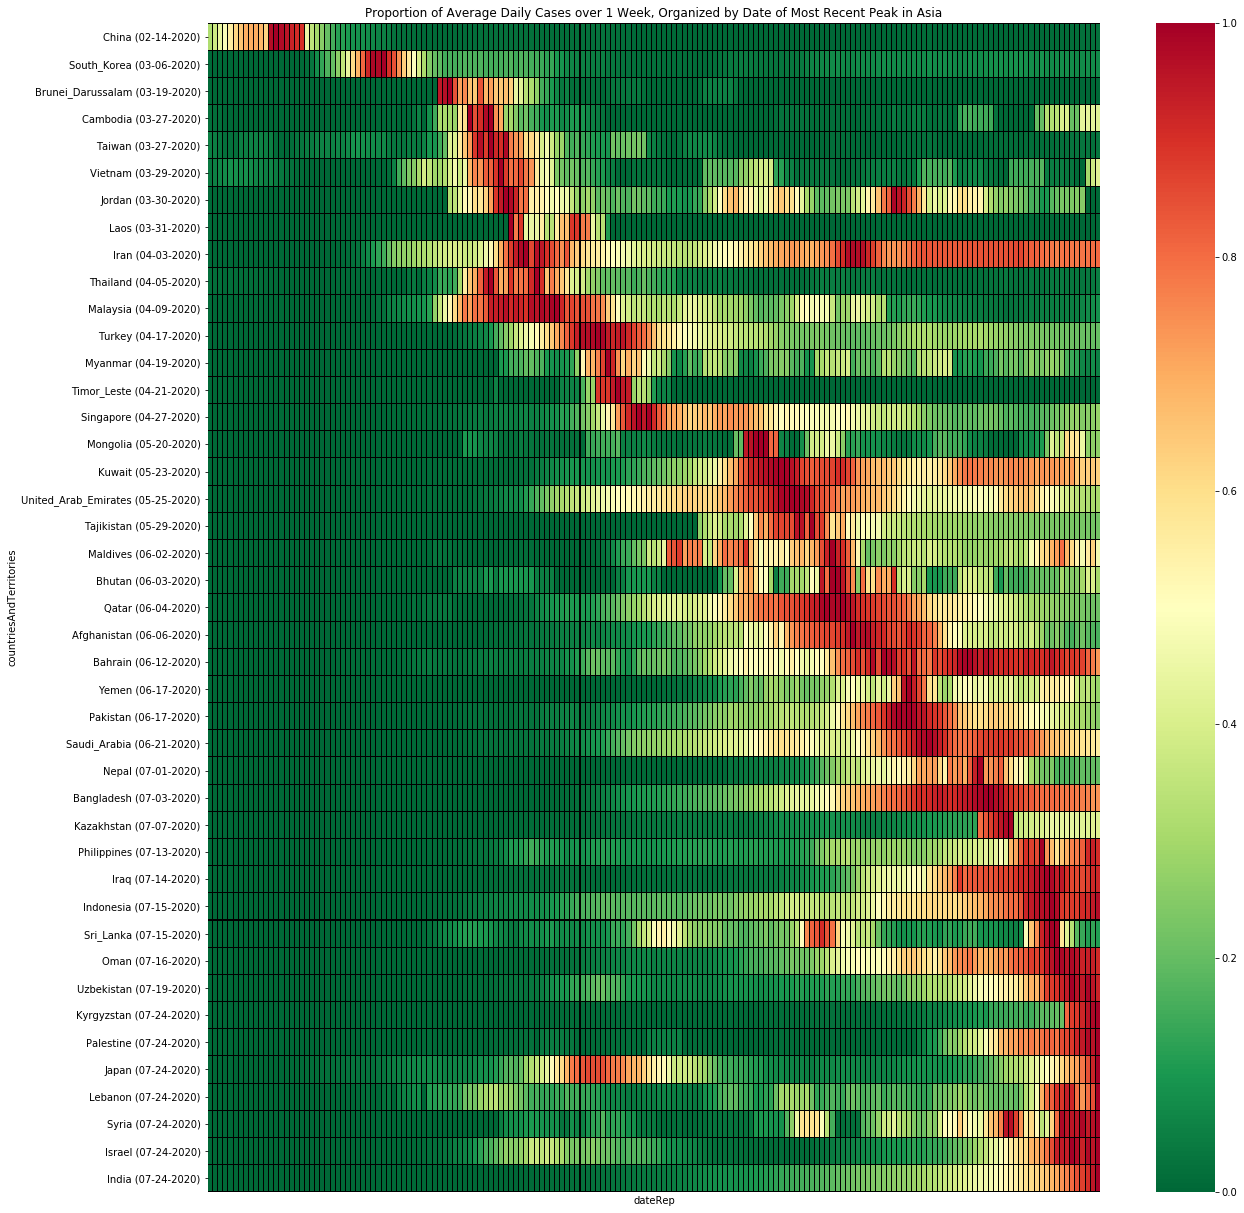

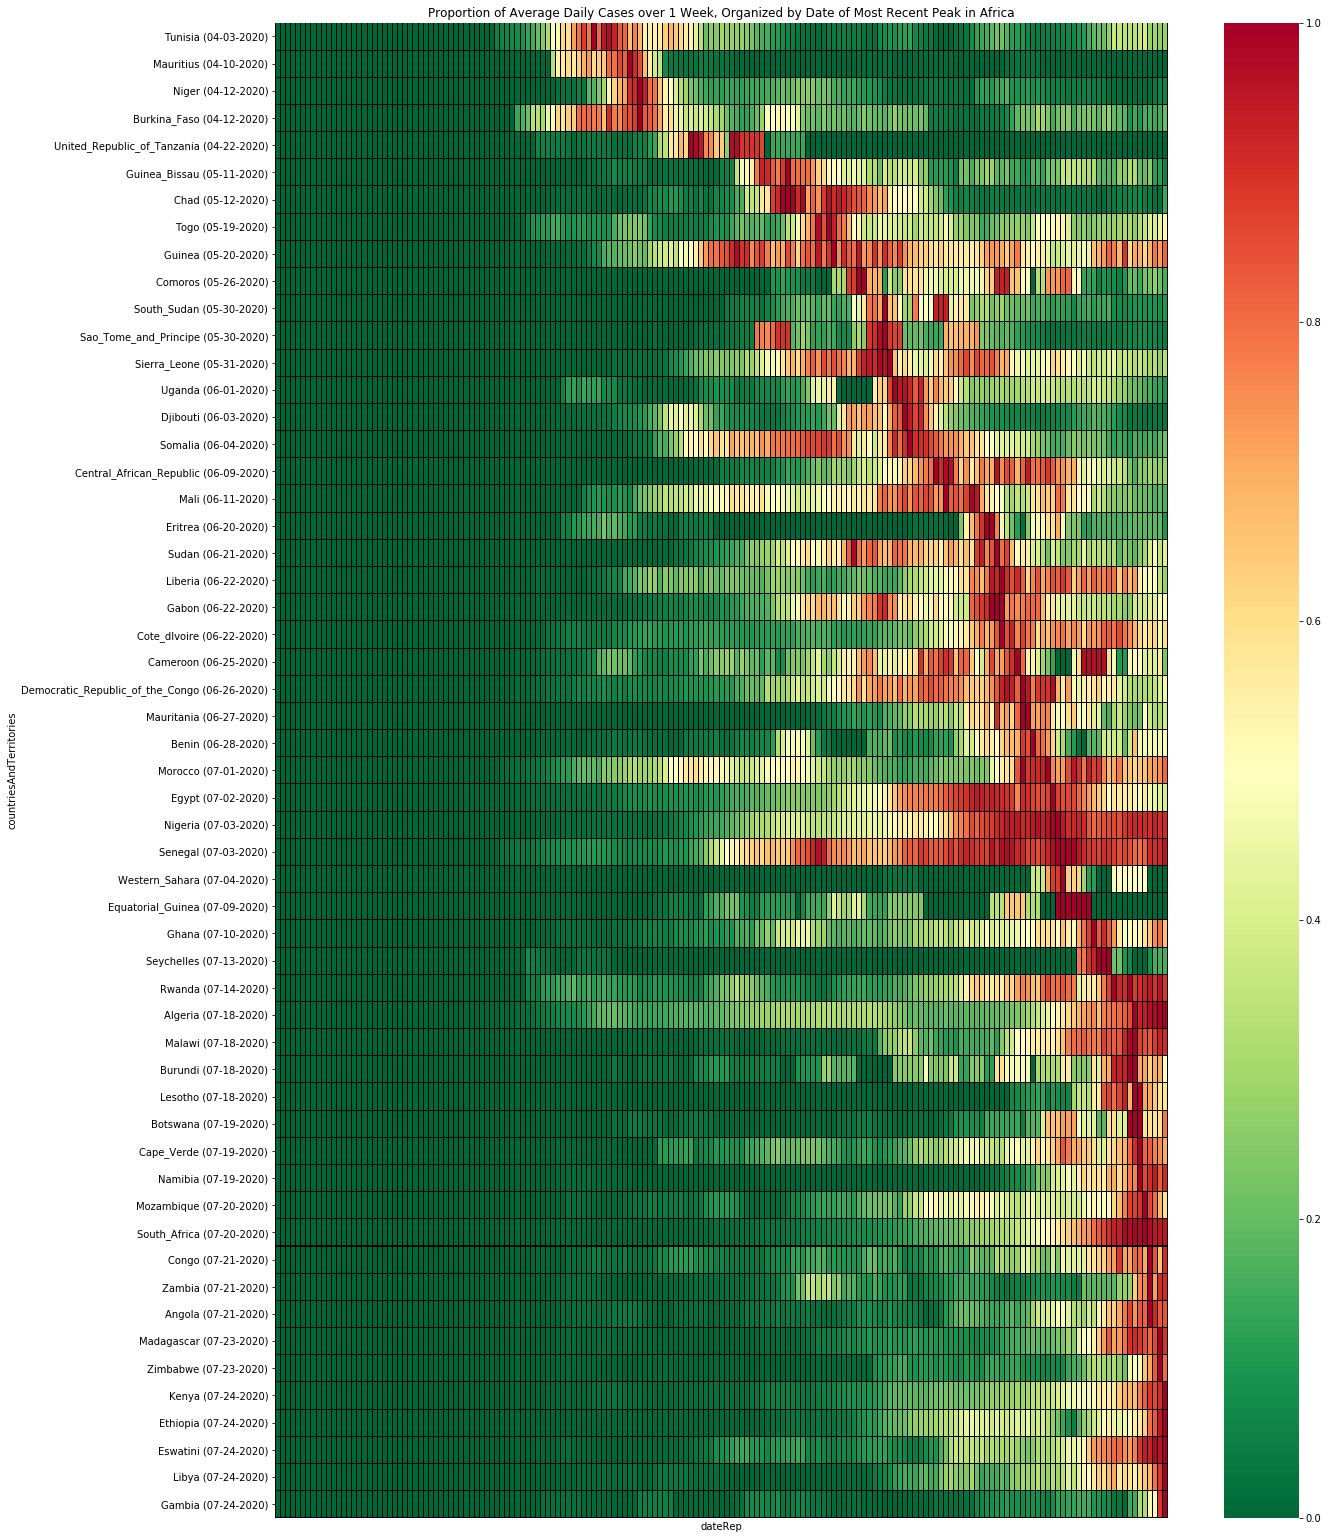

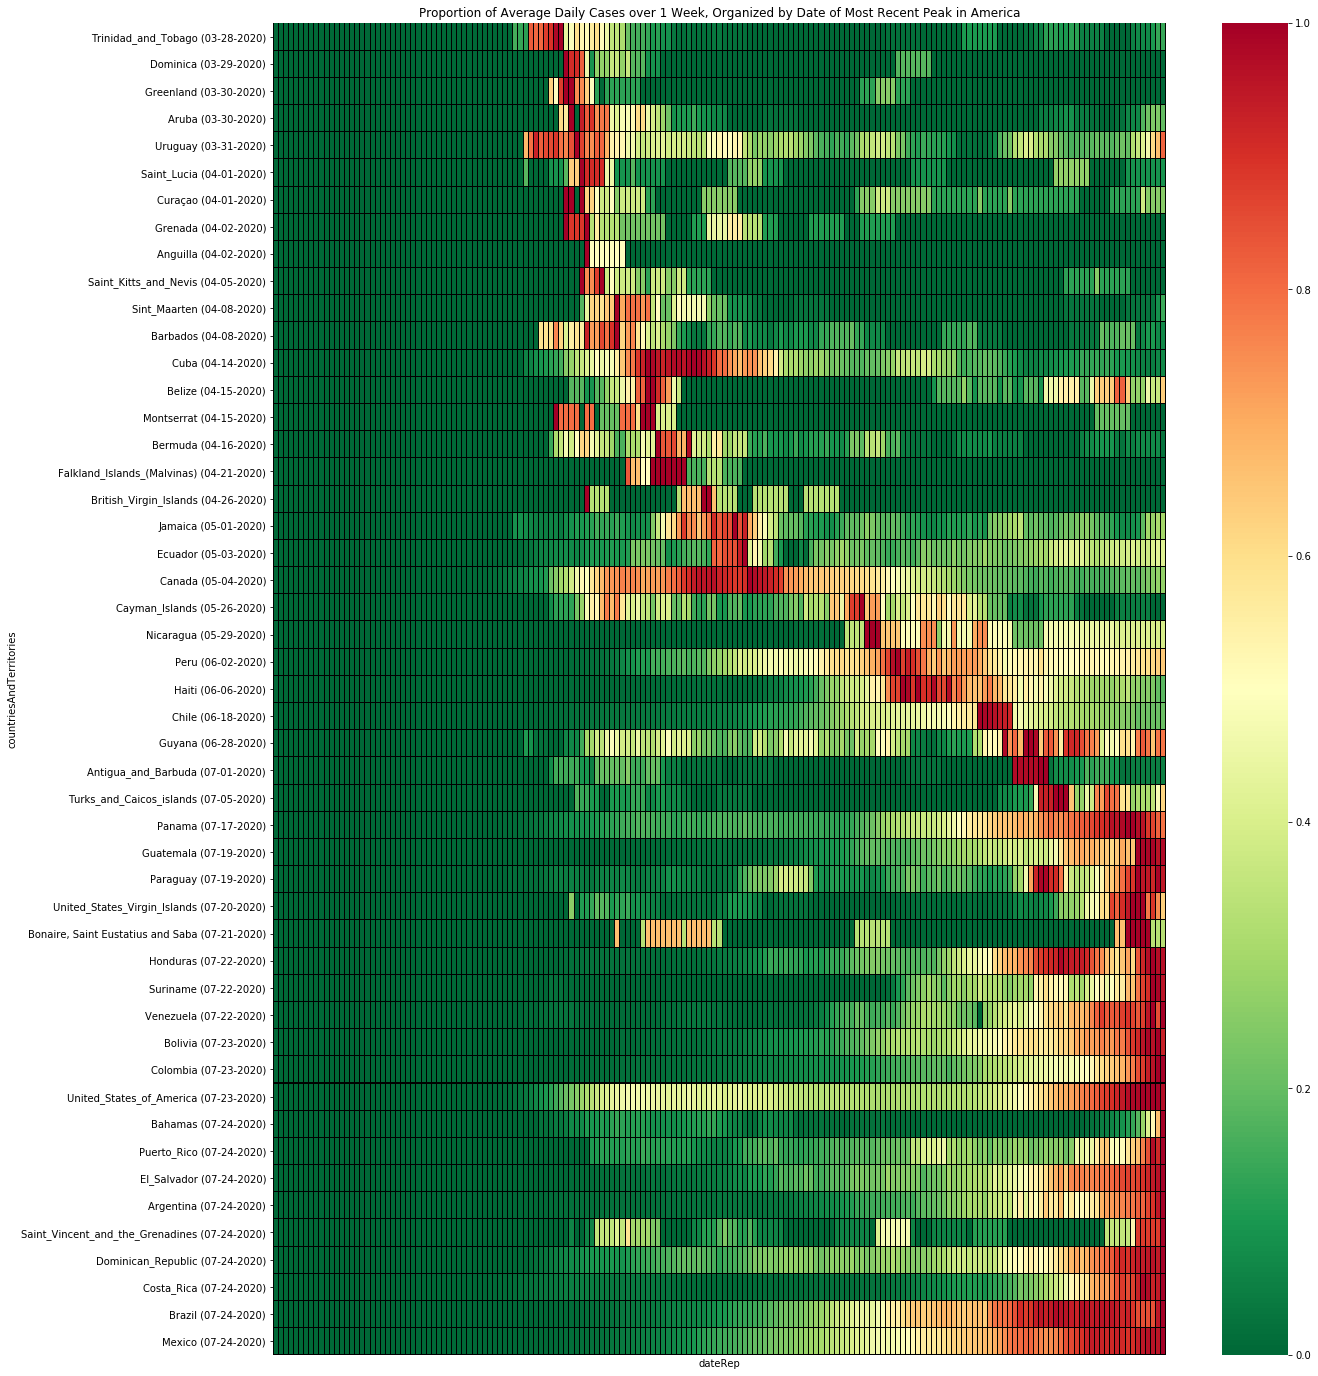

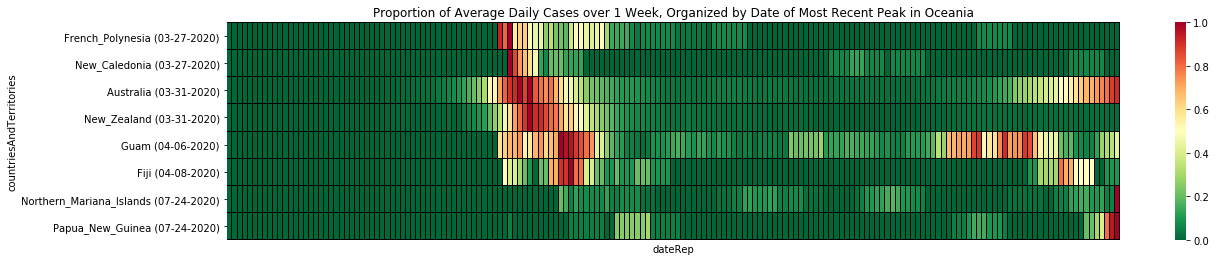

In [15]:
for cont in df['continentExp'].unique():
    if(cont!="Other"):
        df1 = df.copy()
        df1['countriesAndTerritories'] = df1['countriesAndTerritories']+' ('+df1['pcd date']+')'
        df1.head()
        
        val = df1[df1['dateRep']==recentNationDate()]
        val = val[val['continentExp']==cont]
        val = val.sort_values(by=['countriesAndTerritories'])
        val = val['peak case day'].values

        df1 = df1[df1['dateRep'] >= datetime(2020,2,1)]
        df1 = df1[df1['continentExp']==cont]

        nat_heat = df1.pivot('countriesAndTerritories', 'dateRep', 'case proportion')
        nat_heat['peak case day'] = val
        nat_heat = nat_heat.sort_values(by='peak case day')
        nat_heat = nat_heat.drop(['peak case day'], axis=1)
        nat_heat = nat_heat.fillna(0)

        list_size = len(nat_heat[datetime(2020,2,1)])
        fig, ax = plt.subplots(figsize=(20,list_size/2))
        sns.heatmap(nat_heat, cmap='RdYlGn_r', vmin=0, vmax=1, xticklabels=lastLabels, linewidths=.005, linecolor='black')
        plt.title('Proportion of Average Daily Cases over 1 Week, Organized by Date of Most Recent Peak in '+cont)

        fig.savefig('images/Normalized Weekly Average of Daily New Cases ('+cont+')')
        print("Done: "+cont)

In [16]:
current_totals = df[df['dateRep']==recentNationDate()]
color_list = ['#4a89dc', 
              '#8cc152', 
              '#da4453', 
              '#f6bb42', 
              '#d770ad', 
              '#37bc9b', 
              '#a8620c', 
              '#e9573f', 
              '#3bafda', 
              '#967adc', 
              
              #gray
              '#656d78']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_list) 

### Total Cases over Time

Total Cases: 15479391
Total Deaths: 633118


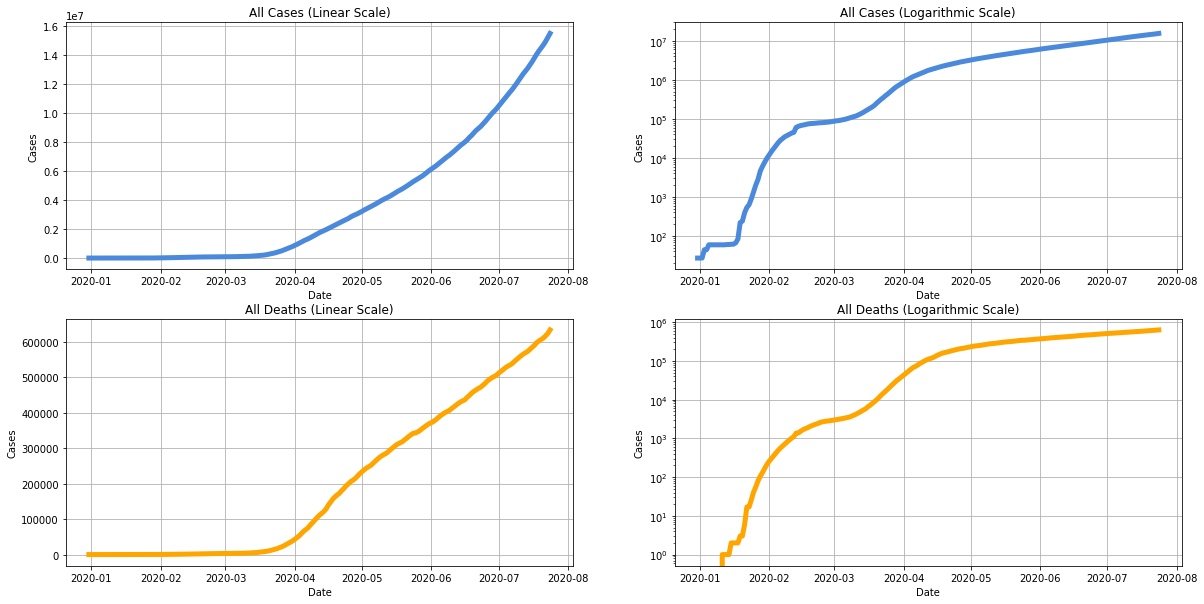

In [17]:
dailyTotal = []
deathTotal = []
daysList = df['dateRep'].unique()

for d in daysList:
    df_temp = df[df['dateRep']==d]
    totCases = sum(df_temp['Total Cases'])
    dailyTotal.append([d, totCases])
    total_deaths = sum(df_temp['Total Deaths'])
    deathTotal.append([d, total_deaths])

print("Total Cases: "+str(dailyTotal[0][1]))
print("Total Deaths: "+str(deathTotal[0][1]))
def myFunc(e):
    return e[0]

dailyTotal.sort(key=myFunc)
deathTotal.sort(key=myFunc)

daysC = []
valsC = []
for d in dailyTotal:
    daysC.append(d[0])
    valsC.append(d[1])
    
daysD = []
valsD = []
for d in deathTotal:
    daysD.append(d[0])
    valsD.append(d[1])
    
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
ax0.plot(daysC, valsC, linewidth=5)
ax0.set_title('All Cases (Linear Scale)')
ax0.set_ylabel('Cases')
ax0.set_xlabel('Date')
ax0.grid()

ax1.plot(daysC, valsC, linewidth=5)
ax1.set_title('All Cases (Logarithmic Scale)')
ax1.set_yscale('log')
ax1.set_ylabel('Cases')
ax1.set_xlabel('Date')
ax1.grid()

ax2.plot(daysD, valsD, linewidth=5, color='orange')
ax2.set_title('All Deaths (Linear Scale)')
ax2.set_ylabel('Cases')
ax2.set_xlabel('Date')
ax2.grid()

ax3.plot(daysD, valsD, linewidth=5, color='orange')
ax3.set_title('All Deaths (Logarithmic Scale)')
ax3.set_yscale('log')
ax3.set_ylabel('Cases')
ax3.set_xlabel('Date')
ax3.grid()

fig.set_figwidth(20)
fig.set_figheight(10)
fig.savefig('images/Cases and Deaths')

In [18]:
high_new_cases = current_totals.sort_values(by='weekly case avg', ascending=False)
high_new_cases.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,...,Cases/1M Pop,Deaths/1M Pop,New Case %,New Death %,weekly case avg,weekly death avg,case proportion,death proportion,peak case day,pcd date
30430,2020-07-24,24,7,2020,63196,1052,United_States_of_America,US,USA,3.290649e+08,...,12259.289251,438.339041,1.591476,0.734688,65411.571429,840.571429,0.970879,0.309586,2020-07-23,07-23-2020
13733,2020-07-24,24,7,2020,49310,740,India,IN,IND,1.366418e+09,...,942.570451,22.395054,3.980995,2.478149,40587.571429,714.142857,1.000000,1.000000,2020-07-24,07-24-2020
4131,2020-07-24,24,7,2020,59961,1311,Brazil,BR,BRA,2.110495e+08,...,10838.570070,398.399392,2.691835,1.583888,39332.000000,1056.285714,1.000000,0.985341,2020-07-24,07-24-2020
26699,2020-07-24,24,7,2020,13104,153,South_Africa,ZA,ZAF,5.855827e+07,...,6968.307310,104.050210,3.317905,2.575758,11975.857143,203.428571,0.951695,0.957633,2020-07-20,07-20-2020
6443,2020-07-24,24,7,2020,7945,315,Colombia,CO,COL,5.033944e+07,...,4496.930965,152.723184,3.637354,4.272345,7595.285714,237.000000,0.998273,1.000000,2020-07-23,07-23-2020
19049,2020-07-24,24,7,2020,8438,718,Mexico,MX,MEX,1.275755e+08,...,2905.823734,328.495600,2.329176,1.743142,6667.285714,619.142857,1.000000,0.773929,2020-07-24,07-24-2020
24271,2020-07-24,24,7,2020,5848,147,Russia,RU,RUS,1.458723e+08,...,5450.234335,88.378695,0.741013,1.153393,6034.428571,136.428571,0.549491,0.759141,2020-05-13,05-13-2020
1043,2020-07-24,24,7,2020,5782,111,Argentina,AR,ARG,4.478068e+07,...,3168.487299,58.440388,4.248191,4.429370,4391.428571,72.142857,1.000000,1.000000,2020-07-24,07-24-2020
23117,2020-07-24,24,7,2020,4546,3887,Peru,PE,PER,3.251046e+07,...,11414.663993,543.025196,1.240213,28.234183,4215.714286,719.857143,0.640686,1.000000,2020-06-02,06-02-2020
2454,2020-07-24,24,7,2020,2856,50,Bangladesh,BD,BGD,1.630462e+08,...,1325.452760,17.179183,1.339248,1.817521,2826.714286,43.571429,0.741892,0.971338,2020-07-03,07-03-2020


### Total Cases Pie Chart

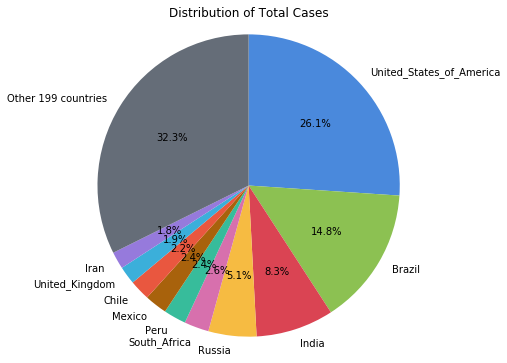

[4034102, 2287475, 1287945, 795038, 408052, 371096, 370712, 338759, 297146, 284034, 5005032]


In [19]:
# total cases pie chart
pie_df = current_totals[['countriesAndTerritories', 'Total Cases']]
pie_df = pie_df.sort_values(by=['Total Cases'], ascending=False)

values = pie_df['Total Cases'][:10].tolist()
labels = pie_df['countriesAndTerritories'][:10].tolist()
rest = pie_df[10:].sum(axis = 0, skipna = True)[1]
count = pie_df[10:].count(axis = 0)[1]
values.append(rest)
labels.append('Other '+str(count)+' countries')

plt.pie(values, labels=labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Total Cases')

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print(values)

fig.savefig('images/Global Distribution of Cases')

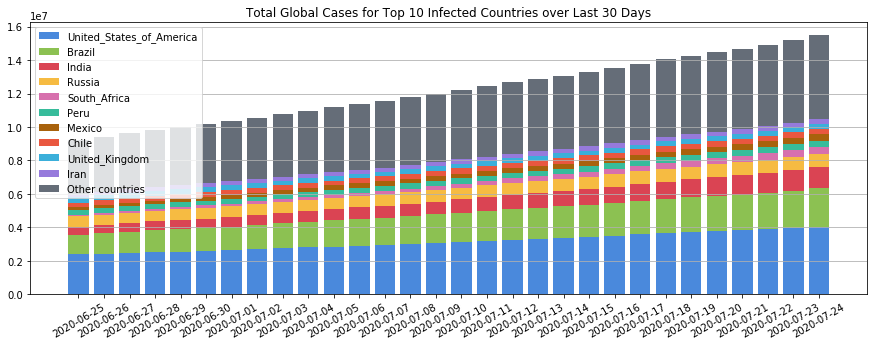

In [20]:
num_charts = 30
recent_date = df['dateRep'][0] 

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recent_date]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()
# print(labels)

dates = []

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    dates.append(str(day.date()))
    recent = df[df['dateRep']==day]
    
    current_totals = recent[['countriesAndTerritories', 'Total Cases']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Cases']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    day_back +=1

#x-axis labels
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total Global Cases for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#labels
labels.append('Other countries')
plt.legend(labels)

fig = plt.gcf()
# ax.get_yaxis().set_major_formatter(
#     mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 Cases Over Previous X Days')

### Daily Infection/Country
Graphing the top X most infected countries daily infections over the last X days, so we can see a trend about which countires are becoming more infected

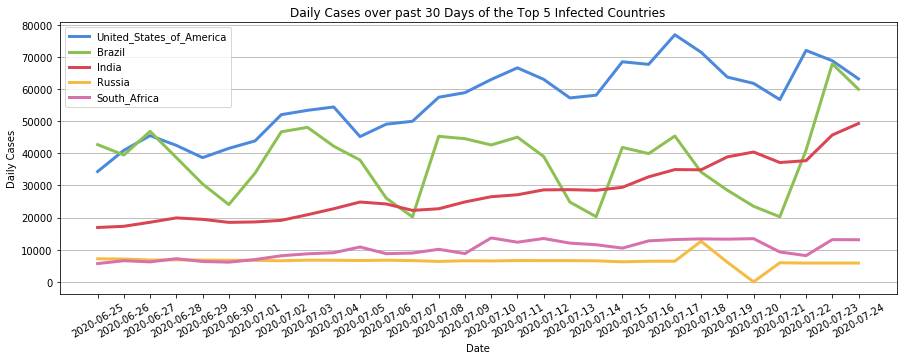

In [21]:
days = 30
top = 5

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top5 = current_totals[:top].values

# Set position of bar on X axis (shift it over twice so it can fit 5 bars)
# data = np.arange(days)

for c in top5:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_nation = df_nation[df_nation['dateRep'].isin(zzz)]
    df_nation = df_nation.iloc[::-1] #reverse the order
    data = np.arange(len(df_nation['cases']))
    plt.plot(data, df_nation['cases'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_nation['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Daily Cases over past "+str(days)+" Days of the Top "+str(top)+" Infected Countries")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Daily Cases of Top 10 Infected Countries')

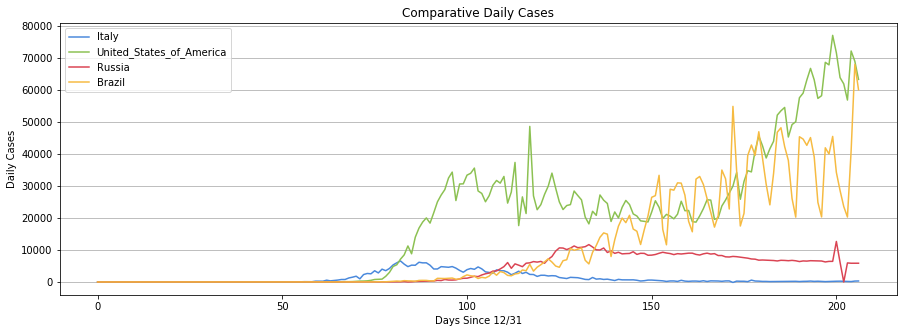

In [22]:
pick = [
    'Italy', 
    'United_States_of_America',
    'Russia',
    'Brazil'
    ]

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

for c in pick:
    #reset global variables
    current_totals = df[df['countriesAndTerritories']==c]
    data = np.arange(len(current_totals['dateRep']))
    current_totals = current_totals.iloc[::-1] #reverse the order
    current_totals = current_totals.reset_index(drop=True)
    plt.plot(data, current_totals['cases'], label=c)

plt.title("Comparative Daily Cases")
plt.xlabel("Days Since 12/31")
plt.ylabel("Daily Cases")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

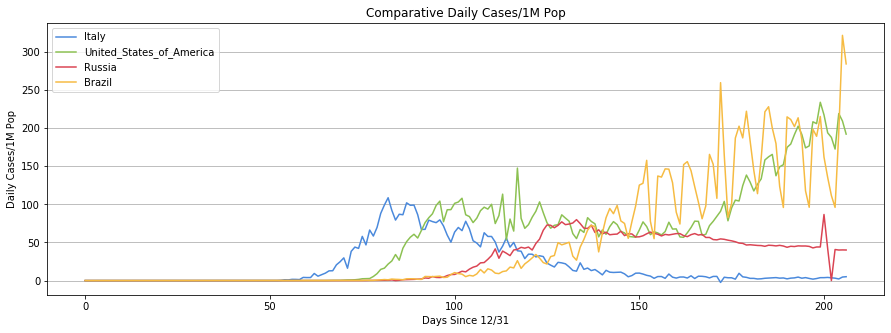

In [23]:
#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

for c in pick:
    #reset global variables
    current_totals = df[df['countriesAndTerritories']==c]
    data = np.arange(len(current_totals['dateRep']))
    current_totals = current_totals.iloc[::-1] #reverse the order
    current_totals = current_totals.reset_index(drop=True)
    plt.plot(data, (current_totals['cases']/current_totals['popData2019'])*1000000, label=c)

plt.title("Comparative Daily Cases/1M Pop")
plt.xlabel("Days Since 12/31")
plt.ylabel("Daily Cases/1M Pop")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

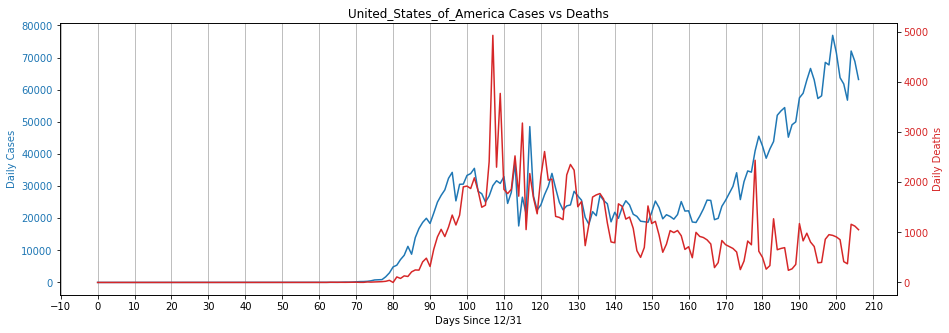

In [24]:
pick = 'United_States_of_America' 
#'United_States_of_America' #'Italy' #'Spain' #'Germany' #'France' #'Iran' #'United_Kingdom' #'Sweden'

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=False)

#reset global variables
current_totals = df[df['countriesAndTerritories']==pick]
data = np.arange(len(current_totals['dateRep']))
current_totals = current_totals.iloc[::-1] #reverse the order
current_totals = current_totals.reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(15,5))
plt.grid(axis='x')

color = 'tab:blue'
ax1.set_xlabel('Days Since 12/31')
ax1.set_ylabel('Daily Cases', color=color)
ax1.plot(data, current_totals['cases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Daily Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(data, current_totals['deaths'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(MultipleLocator(10))
plt.title(pick+" Cases vs Deaths")
plt.show()

fig.savefig('images/Comparing Cases vs Deaths')

In [25]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp', 'Total Cases', 'Total Deaths',
       'Cases/1M Pop', 'Deaths/1M Pop', 'New Case %', 'New Death %',
       'weekly case avg', 'weekly death avg', 'case proportion',
       'death proportion', 'peak case day', 'pcd date'],
      dtype='object')

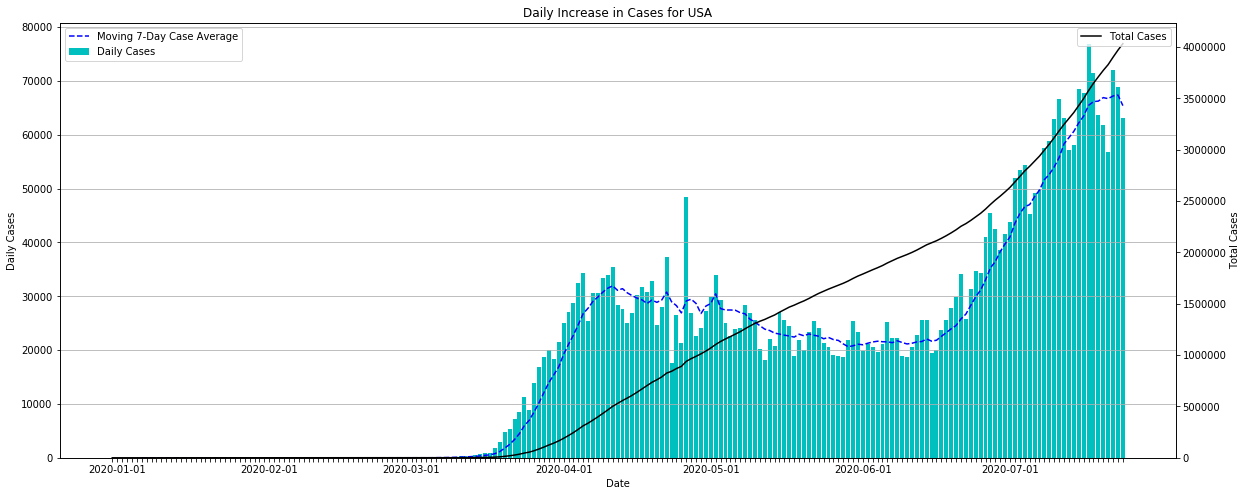

In [26]:
#updates the charts for all 50 states + DC

temp_df = df[df['countriesAndTerritories']=='United_States_of_America'].reset_index(drop=True)
temp_df = temp_df.sort_values(by='dateRep')

#date labels
dates = []
for d in temp_df['dateRep'].tolist():
    if d.day==1: dates.append(str(d.date()))
    else: dates.append('')

x_val = np.arange(len(temp_df['dateRep']))

#plotting
fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Cases')
ax1.bar(x=x_val, bottom=0, height=temp_df['cases'], label='Daily Cases', color='c')
ax1.plot(x_val, temp_df['weekly case avg'],  label='Moving 7-Day Case Average', color='b', linestyle='dashed')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Total Cases')
ax2.plot(x_val, temp_df['Total Cases'],  label='Total Cases', color='k')
# ax2.plot(x_val, temp_df['weekly death avg'],  label='Running Average', color='k', linestyle='dashed')

plt.title('Daily Increase in Cases for USA')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(x_val, dates, rotation=30) 
fig = plt.gcf()
ax1.grid(axis='y')

plt.ylim(0)

plt.show()
fig.savefig('images/USA Cases')

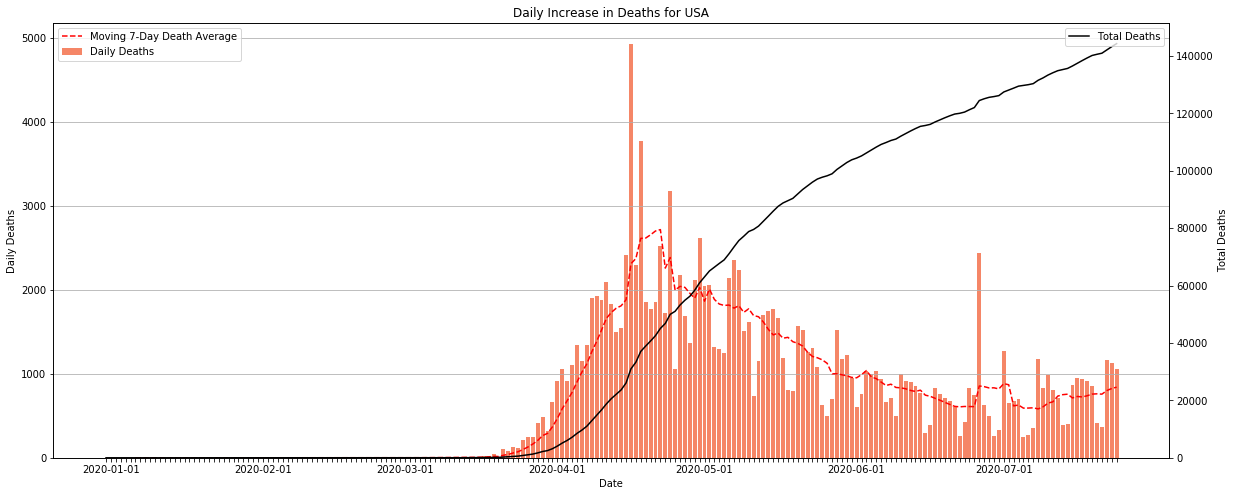

In [27]:
#updates the charts for all 50 states + DC

temp_df = df[df['countriesAndTerritories']=='United_States_of_America'].reset_index(drop=True)
temp_df = temp_df.sort_values(by='dateRep')

#date labels
dates = []
for d in temp_df['dateRep'].tolist():
    if d.day==1: dates.append(str(d.date()))
    else: dates.append('')

x_val = np.arange(len(temp_df['dateRep']))

#plotting
fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Deaths')
ax1.bar(x=x_val, bottom=0, height=temp_df['deaths'], label='Daily Deaths', color='#f58667')
ax1.plot(x_val, temp_df['weekly death avg'],  label='Moving 7-Day Death Average', color='r', linestyle='dashed')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Total Deaths')
ax2.plot(x_val, temp_df['Total Deaths'],  label='Total Deaths', color='k')
# ax2.plot(x_val, temp_df['weekly death avg'],  label='Running Average', color='k', linestyle='dashed')

plt.title('Daily Increase in Deaths for USA')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(x_val, dates, rotation=30) 
fig = plt.gcf()
ax1.grid(axis='y')

plt.ylim(0)

plt.show()
fig.savefig('images/USA Deaths')

### Increase in Cases

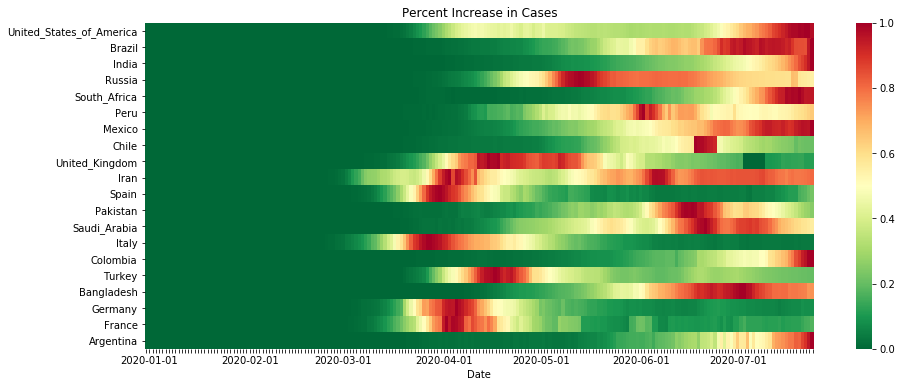

In [28]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['case proportion'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

lastLabels = []
for day in dayLabels:
    if day.date().day == 1:
        lastLabels.append(day.date())
    else:
        lastLabels.append('')

fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(vals, cmap='RdYlGn_r', vmin=0, vmax=1, yticklabels=labels, xticklabels=lastLabels)
plt.title('Percent Increase in Cases')
plt.xlabel('Date')

fig.savefig('images/Percent Increase in New Cases of Top X Infected Countries')

### Infection/Population

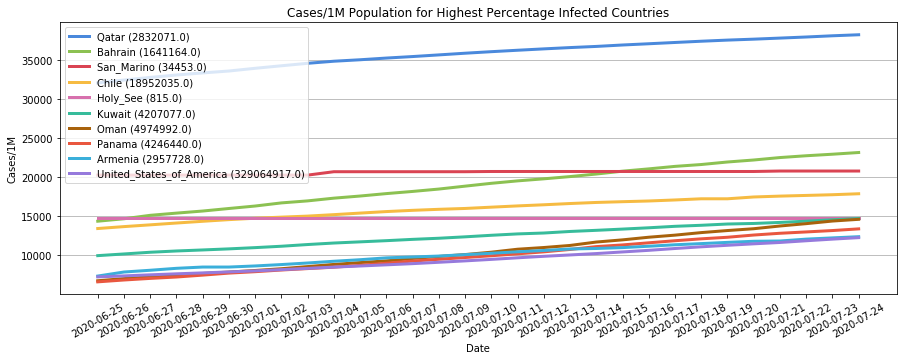

In [29]:
days = 30
top = 10

labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)
recent = df[df['dateRep']==recent_date]

top_infected = recent.sort_values(by='Cases/1M Pop', ascending=False)['countriesAndTerritories'][:top]

for c in top_infected:
    df_temp=df[df['countriesAndTerritories']==c]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Cases/1M Pop']))
    plt.plot(data, df_temp['Cases/1M Pop'], label=c+" ("+str(df_temp['popData2019'].values[-1])+")", linewidth=3)
    
#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Cases/1M Population for Highest Percentage Infected Countries")
plt.xlabel("Date")
plt.ylabel("Cases/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Highest Infection Rates')

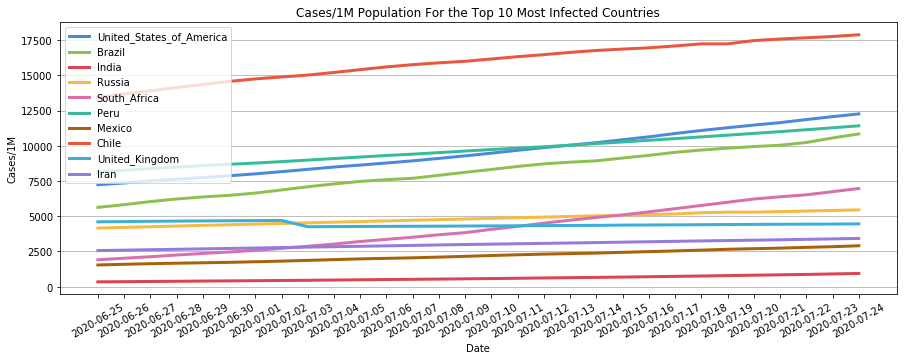

In [30]:
days = 30
top = 10

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top10list = current_totals[:top].values.tolist()

for c in top10list:
    df_temp=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Cases/1M Pop']))
    plt.plot(data, df_temp['Cases/1M Pop'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

plt.title("Cases/1M Population For the Top 10 Most Infected Countries")
plt.xlabel("Date")
plt.ylabel("Cases/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Infection Rates of Top 10')

### Total Cases by Days Since First Infection Reported
In this cell, I am attempting to show the spread of the virus in each country since an infection was first reported. This will allow people to see how fast the infection is spreading in each country relative to the infection instead of having each country staggered.

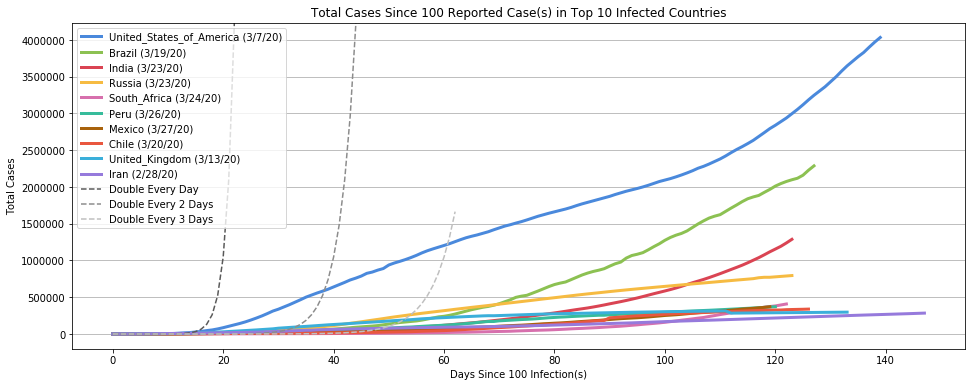

In [31]:
n = 10
cases = 100

#reset dataframes
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>=cases].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Total Cases'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(63)
plt.plot(x,2**(x)+cases,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+cases,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+cases,'--', label = "Double Every 3 Days", color = '0.75')

# plt.ylim(bottom, top)     # set the ylim to bottom, top
# plt.xlim(left, right)     # set the xlim to left, right

plt.legend()
plt.title("Total Cases Since "+str(cases)+" Reported Case(s) in Top 10 Infected Countries")
plt.ylabel("Total Cases")
plt.xlabel("Days Since "+str(cases)+" Infection(s)")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)
plt.show()

fig.savefig('images/Total Infections Since X Cases')

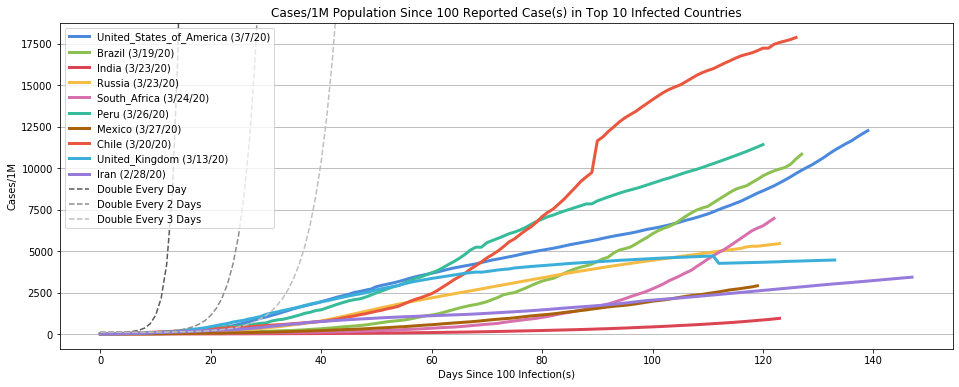

In [32]:
n = 10
cases = 100

#reset dataframes
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>=cases].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Cases/1M Pop'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(63)
plt.plot(x,2**(x)+cases,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+cases,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+cases,'--', label = "Double Every 3 Days", color = '0.75')


plt.legend()
plt.title("Cases/1M Population Since "+str(cases)+" Reported Case(s) in Top 10 Infected Countries")
plt.ylabel("Cases/1M")
plt.xlabel("Days Since "+str(cases)+" Infection(s)")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)     # set the ylim to bottom, top
plt.show()

fig.savefig('images/Cases per 1M Population since X Reported Case(s)')

In [33]:
def getKey(df):
    return df[1]

In [34]:
first_infected = []
for c in countries:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['cases']>0].tail(1) #grab the first date of the infection
    if(day1.empty==False):
        first_infected.append([c, day1.iloc[0]['dateRep']])
first_infected = sorted(first_infected, key=getKey)
print(len(first_infected))
first_infected

210


[['China', Timestamp('2019-12-31 00:00:00')],
 ['Thailand', Timestamp('2020-01-13 00:00:00')],
 ['Japan', Timestamp('2020-01-15 00:00:00')],
 ['South_Korea', Timestamp('2020-01-20 00:00:00')],
 ['Taiwan', Timestamp('2020-01-21 00:00:00')],
 ['United_States_of_America', Timestamp('2020-01-21 00:00:00')],
 ['Singapore', Timestamp('2020-01-24 00:00:00')],
 ['Vietnam', Timestamp('2020-01-24 00:00:00')],
 ['Australia', Timestamp('2020-01-25 00:00:00')],
 ['France', Timestamp('2020-01-25 00:00:00')],
 ['Malaysia', Timestamp('2020-01-25 00:00:00')],
 ['Nepal', Timestamp('2020-01-25 00:00:00')],
 ['Canada', Timestamp('2020-01-26 00:00:00')],
 ['United_Arab_Emirates', Timestamp('2020-01-27 00:00:00')],
 ['Cambodia', Timestamp('2020-01-28 00:00:00')],
 ['Germany', Timestamp('2020-01-28 00:00:00')],
 ['Sri_Lanka', Timestamp('2020-01-28 00:00:00')],
 ['Finland', Timestamp('2020-01-30 00:00:00')],
 ['India', Timestamp('2020-01-30 00:00:00')],
 ['Philippines', Timestamp('2020-01-30 00:00:00')],
 ['I

# Death Data
This section will show the same information as above, but focus on deaths instead of total cases

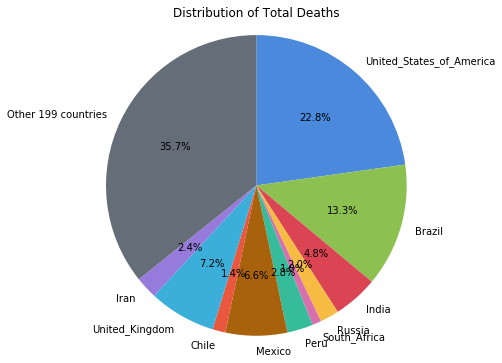

[144242, 84082, 30601, 12892, 6093, 17654, 41908, 8838, 45554, 15074, 226180]


In [35]:
# total deaths pie chart
recent = df[df['dateRep']==recentNationDate()]

current_totals = recent[['countriesAndTerritories', 'Total Cases', 'Total Deaths']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
current_totals.head(10)

values = current_totals['Total Deaths'][:10].tolist()

labels = current_totals['countriesAndTerritories'][:10].tolist()
rest = current_totals[10:].sum(axis = 0, skipna = True)[2]
count = current_totals[10:].count(axis = 0)[2]
values.append(rest)
labels.append('Other '+str(count)+' countries')

plt.pie(values, labels=labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Total Deaths')

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()
print(values)

fig.savefig('images/Global Distribution of Deaths')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


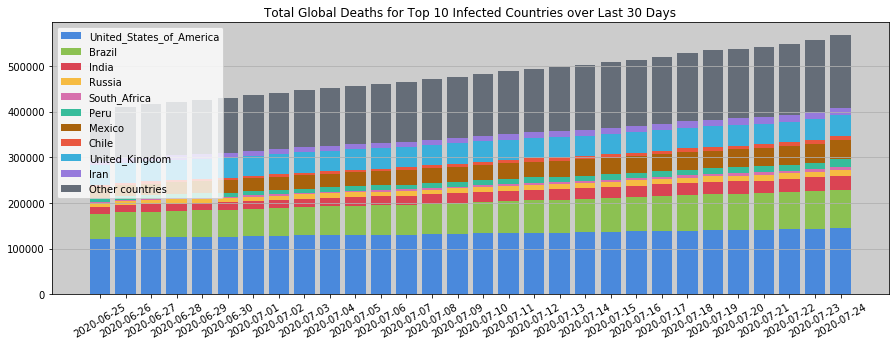

In [36]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)

#country labels
recent = df[df['dateRep']==recentNationDate()]
recent = recent.sort_values(by=['Total Cases'], ascending=False)
labels = recent['countriesAndTerritories'][:10].tolist()

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    recent = df[df['dateRep']==day]
    
    current_totals = recent[['countriesAndTerritories', 'Total Deaths']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['countriesAndTerritories']==c,['Total Deaths']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['Total Deaths'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    
    day_back +=1

#x-axis labels
dates = []
x_lab = df['dateRep'][:num_charts]
for d in x_lab.tolist():
    dates.append(str(d.date()))
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total Global Deaths for Top 10 Infected Countries over Last '+str(num_charts)+' Days')

#labels
labels.append('Other countries')
plt.legend(labels)


#background color
ax = plt.axes()
ax.set_facecolor("0.8")

fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 Deaths Over Previous X Days')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


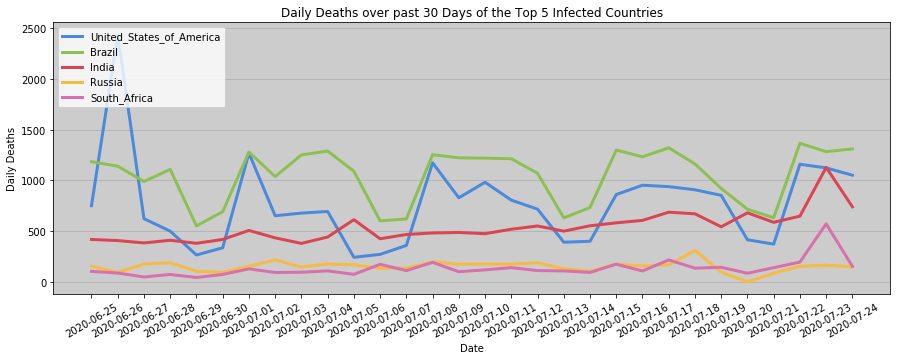

In [37]:
days = 30
top = 5

#variables
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top5 = current_totals[:top].values

# Set position of bar on X axis (shift it over twice so it can fit 5 bars)
data = np.arange(days)

for c in top5:
    df_nation=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_nation = df_nation[df_nation['dateRep'].isin(zzz)]
    df_nation = df_nation.iloc[::-1] #reverse the order
    data = np.arange(len(df_nation['deaths']))
    plt.plot(data, df_nation['deaths'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_nation['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.title("Daily Deaths over past "+str(days)+" Days of the Top "+str(top)+" Infected Countries")
plt.xlabel("Date")
plt.ylabel("Daily Deaths")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Daily Deaths of Top 10 Infected Countries')

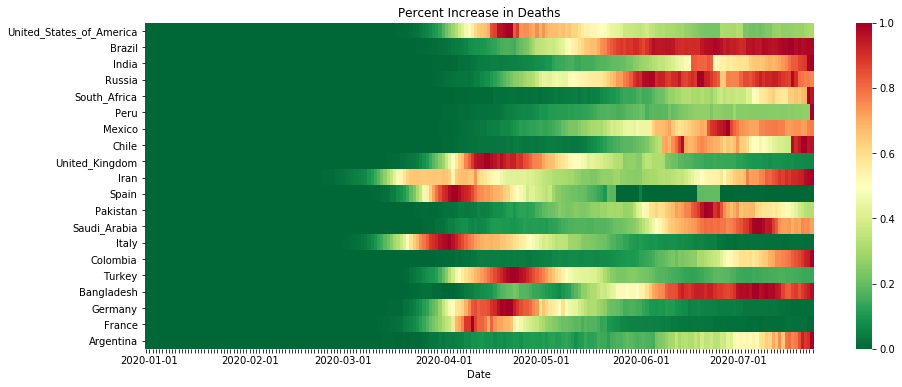

In [38]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values


days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep']
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['death proportion'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

lastLabels = []
for day in dayLabels:
    if day.date().day == 1:
        lastLabels.append(day.date())
    else:
        lastLabels.append('')

lastLabels = lastLabels[::-1]
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(vals, cmap='RdYlGn_r', vmin=0, vmax=1, yticklabels=labels, xticklabels=lastLabels)
plt.title('Percent Increase in Deaths')
plt.xlabel('Date')

fig.savefig('images/Percent Increase in New Deaths of Top X Infected Countries')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


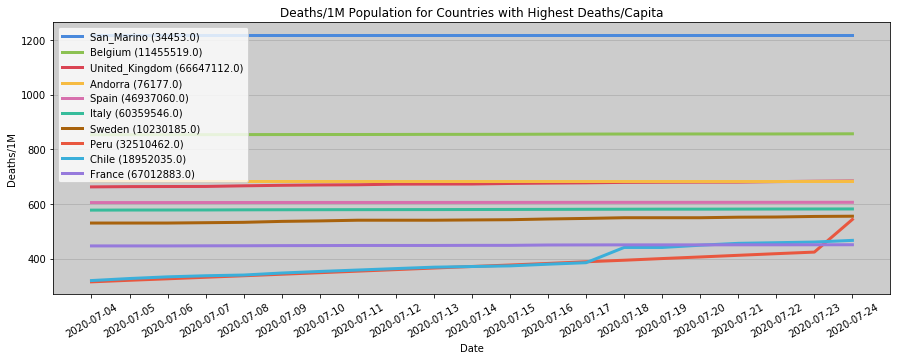

In [39]:
days = 21
top = 10

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)
recent = df[df['dateRep']==recent_date]

top_infected = recent.sort_values(by='Deaths/1M Pop', ascending=False)['countriesAndTerritories'][:top]

for c in top_infected:
    df_temp=df[df['countriesAndTerritories']==c]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Deaths/1M Pop']))
    plt.plot(data, df_temp['Deaths/1M Pop'], label=c+" ("+str(df_temp['popData2019'].values[-1])+")", linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")    

plt.title("Deaths/1M Population for Countries with Highest Deaths/Capita")
plt.xlabel("Date")
plt.ylabel("Deaths/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Highest Death Rates')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


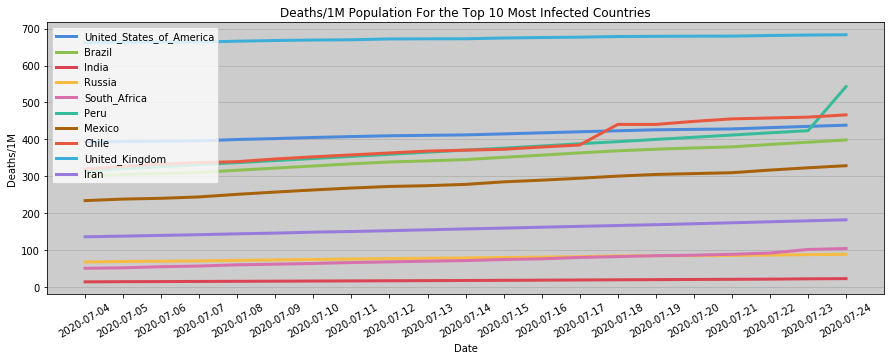

In [40]:
days = 21

data = np.arange(days)
labels = df['dateRep'].value_counts()
times = sorted(labels.keys().tolist(), reverse=True)

#reset global variables
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
top10list = current_totals[:10].values.tolist()

for c in top10list:
    df_temp=df[df['countriesAndTerritories']==c[0]]
    zzz = times[:days]
    df_temp = df_temp[df_temp['dateRep'].isin(zzz)]
    df_temp = df_temp.iloc[::-1] #reverse the order
    data = np.arange(len(df_temp['Deaths/1M Pop']))
    plt.plot(data, df_temp['Deaths/1M Pop'], label=c[0], linewidth=3)

#date labels
dates = []
for d in df_temp['dateRep'].tolist():
    dates.append(str(d.date()))

#background color
ax = plt.axes()
ax.set_facecolor("0.8")
    
plt.title("Deaths/1M Population For the Top 10 Most Infected Countries")
plt.xlabel("Date")
plt.ylabel("Deaths/1M")
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels.
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Death Rates of Top 10')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


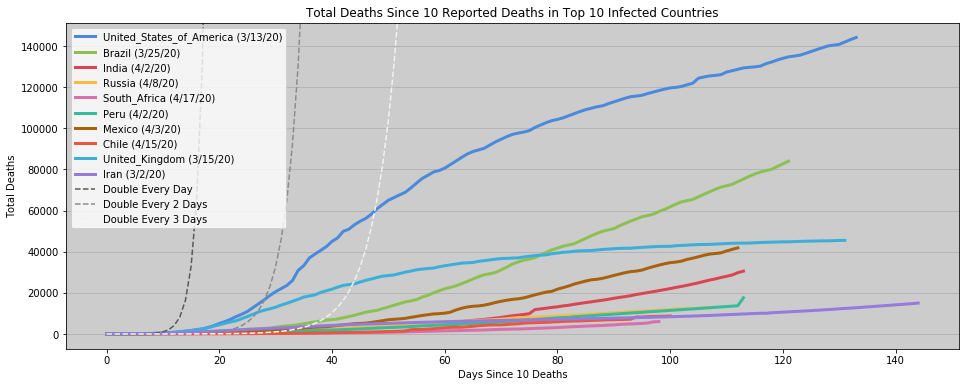

In [41]:
n = 10
deaths = 10

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['deaths']>=deaths].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
    df_spread['Total Deaths'] = total_cases(df_spread, 'deaths')
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Total Deaths'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(60)
plt.plot(x,2**(x)+deaths,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+deaths,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+deaths,'--', label = "Double Every 3 Days", color = '0.95')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.legend()
# plt.yscale('log')
plt.title("Total Deaths Since "+str(deaths)+" Reported Deaths in Top 10 Infected Countries")
plt.ylabel("Total Deaths")
plt.xlabel("Days Since "+str(deaths)+" Deaths")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)     # set the ylim to bottom, top

plt.show()

fig.savefig('images/Total Deaths Since X Reported Deaths')

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


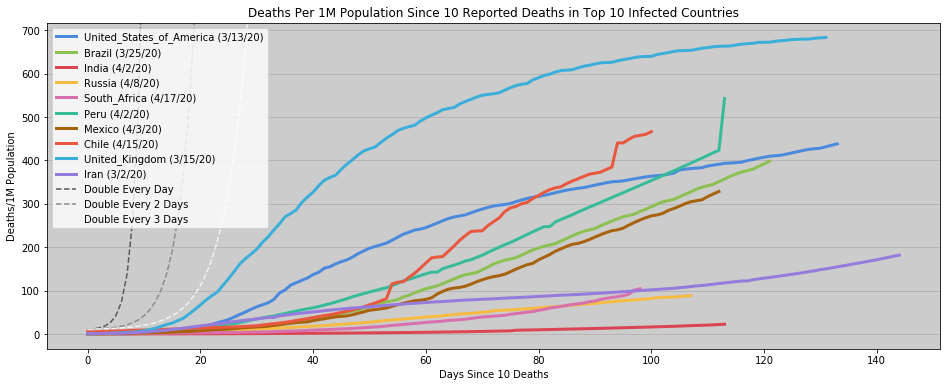

In [42]:
n = 10
deaths = 10

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

first_infected = []
top10 = current_totals[:n]
top10 = top10['countriesAndTerritories'].tolist()
for c in top10:
    df_temp = df[df['countriesAndTerritories'] == c]
    day1 = df_temp[df_temp['deaths']>=deaths].tail(1) #grab the first date of the infection
    df_spread = df_temp[df_temp['dateRep']>=day1.iloc[0]['dateRep']]
    df_spread = df_spread.iloc[::-1] #reverse the order
    df_spread = df_spread.reset_index(drop=True)
#     df_spread['Total Deaths'] = total_cases(df_spread, 'deaths')
    month = str(day1['month'].values[0])
    day = str(day1['day'].values[0])
    year = str(day1['year'].values[0])[2:]
    plt.plot(df_spread['Deaths/1M Pop'], linewidth=3, label=c+" ("+month+"/"+day+"/"+year+")")
    
#lock graph in place
top, bottom = plt.ylim()  # return the current ylim

#trend lines
x = np.arange(60)
plt.plot(x,2**(x)+deaths,'--', label = "Double Every Day", color = '0.35')
plt.plot(x,2**(x/2)+deaths,'--', label = "Double Every 2 Days", color = '0.55')
plt.plot(x,2**(x/3)+deaths,'--', label = "Double Every 3 Days", color = '0.95')

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

plt.legend()
# plt.yscale('log')
plt.title("Deaths Per 1M Population Since "+str(deaths)+" Reported Deaths in Top 10 Infected Countries")
plt.ylabel("Deaths/1M Population")
plt.xlabel("Days Since "+str(deaths)+" Deaths")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.grid(axis='y')
plt.ylim(top, bottom)
plt.show()

fig.savefig('images/Deaths Per 1M Population Since X Reported Deaths')

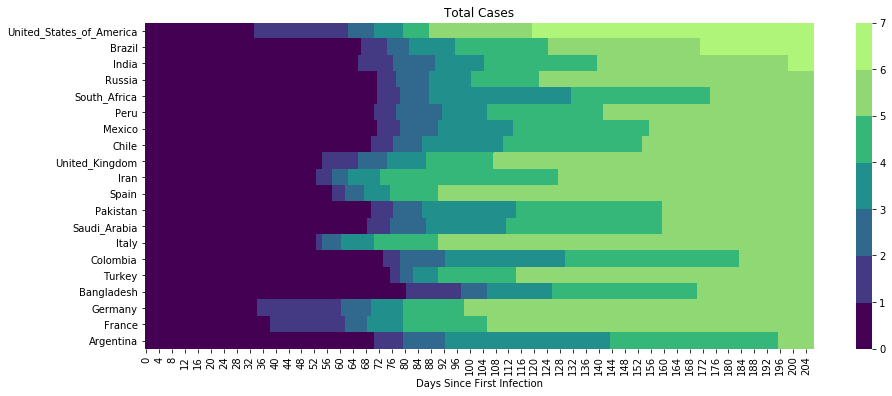

In [43]:
top = 20

#reset global variables
recent = df[df['dateRep']==recent_date]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by=['Total Cases'], ascending=False)
topNum = current_totals[:top].values

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['Total Cases'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    for i in np.arange(len(result)):
        if result[i] >= 0 and result[i] <=10: 
            result[i]=0
        elif result[i] > 10 and result[i] <= 100: 
            result[i]=1
        elif result[i] > 100 and result[i] <= 1000: 
            result[i]=2
        elif result[i] > 1000 and result[i] <= 10000: 
            result[i]=3
        elif result[i] > 10000 and result[i] <= 100000: 
            result[i]=4
        elif result[i] > 100000 and result[i] <= 1000000: 
            result[i]=5
        else: 
            result[i]=6
    
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

#todo: fix this 
cbar_map = {
    1: '1 - 10',
    2: '10 - 100',
    3: '100 - 1000',
    4: '1000 - 10000',
    5: '10000 - 100000',
    6: '100000+',
}

colors = (
    '#440154',
    '#443A83',
    '#31688E',
    '#21908C',
    '#35B779',
    '#8FD874', 
    '#aff57a'
)

# colors = colors[::-1]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

fig, ax = plt.subplots(figsize=(15,6))
heatmap = sns.heatmap(vals, vmax=7, yticklabels=labels, cmap=cmap)

plt.title('Total Cases')
plt.xlabel('Days Since First Infection')

fig.savefig('images/Top 20 Categorical Heat Map')

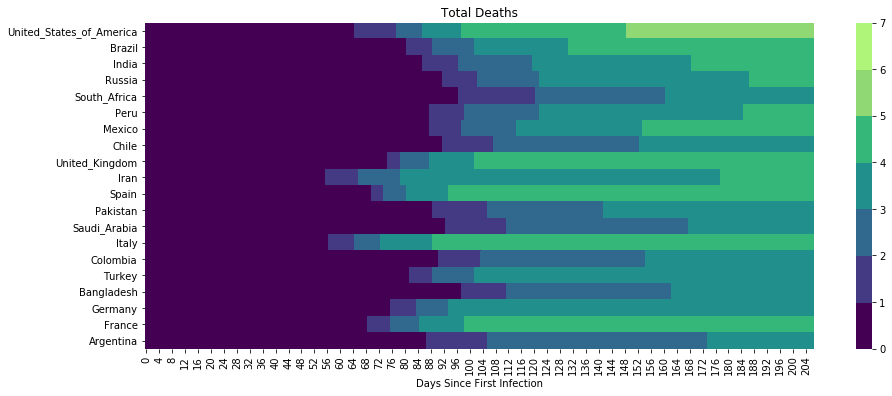

In [44]:
top = 20

#reset dataframes
recent = df[df['dateRep']==recentNationDate()]
current_totals = recent[['countriesAndTerritories', 'Total Cases']]
current_totals = current_totals.sort_values(by='Total Cases', ascending=False)
current_totals = current_totals.reset_index(drop=True)

days = len(df[df['countriesAndTerritories']=='China']['dateRep'])
dayLabels = df[df['countriesAndTerritories']=='China']['dateRep'][::-1]
vals = []
labels = []

for c in topNum:
    df_nation = df[df['countriesAndTerritories']==c[0]]
    inc = np.array(df_nation['Total Deaths'][::-1].values.tolist())
    result = np.pad(inc, (days-len(inc),0))
    result = np.nan_to_num(result, posinf=1)
    for i in np.arange(len(result)):
        if result[i] >= 0 and result[i] <=10: 
            result[i]=0
        elif result[i] > 10 and result[i] <= 100: 
            result[i]=1
        elif result[i] > 100 and result[i] <= 1000: 
            result[i]=2
        elif result[i] > 1000 and result[i] <= 10000: 
            result[i]=3
        elif result[i] > 10000 and result[i] <= 100000: 
            result[i]=4
        elif result[i] > 100000 and result[i] <= 1000000: 
            result[i]=5
        else: 
            result[i]=6
    
    vals.append(result)
    labels.append(c[0])
    
vals = pd.DataFrame(vals)

#todo: fix this 
cbar_map = {
    1: '1 - 10',
    2: '10 - 100',
    3: '100 - 1000',
    4: '1000 - 10000',
    5: '10000 - 100000',
    6: '100000+',
}

colors = (
    '#440154',
    '#443A83',
    '#31688E',
    '#21908C',
    '#35B779',
    '#8FD874', 
    '#aff57a'
)

# colors = colors[::-1]
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

fig, ax = plt.subplots(figsize=(15,6))
heatmap = sns.heatmap(vals, vmax=7, yticklabels=labels, cmap=cmap)

plt.title('Total Deaths')
plt.xlabel('Days Since First Infection')

fig.savefig('images/Top 20 Deaths Categorical Heat Map')

# State Data
This next section will focus on creating insights for individual US states. I am using this data base:
- Case Data: https://covidtracking.com/api/states.csv
- Census Data: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html

to pull my data, which updates freqently (the website says it updates every few minutes, from my experience it updates daily)

In [45]:
states = pd.read_csv('http://covidtracking.com/api/states/daily.csv',
                    parse_dates=['dateChecked'])

states['date'] = pd.to_datetime(states['date'], format='%Y%m%d')

url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv'
statePop = pd.read_csv(url, encoding='ISO-8859-1')
statePop = statePop[statePop['SUMLEV']==40]
statePop = statePop[['STATE', 'POPESTIMATE2019']]
states = pd.merge(states, statePop, left_on='fips', right_on='STATE')

states['test percent']= (states['positive']/(states['positive']+states['negative']))*100
states['cases/1M']= states['positive']/states['POPESTIMATE2019']*1000000
states['deaths/1M']= states['death']/states['POPESTIMATE2019']*1000000
states = states.drop(['STATE'], axis=1)

#this drops all the hospital data, which is currently not used...
states['population'] = states['POPESTIMATE2019']
all_state_data = states
print(all_state_data.columns)
states = states[['date', 'fips', 'state', 'population', 'positive', 'negative', 'total', 'death', 'positiveIncrease', 'deathIncrease', 'totalTestResultsIncrease', 'test percent', 'cases/1M', 'deaths/1M']]

states.head()

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade', 'POPESTIMATE2019', 'test percent', 'cases/1M', 'deaths/1M',
       'population'],
      dtype='object')


,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,totalTestResultsIncrease,test percent,cases/1M,deaths/1M
0,2020-07-23,2,AK,731545,2684.0,186825.0,189509,19.0,65,0,4176,1.416292,3668.947228,25.972428
1,2020-07-22,2,AK,731545,2619.0,182714.0,185333,19.0,94,1,6707,1.413132,3580.094184,25.972428
2,2020-07-21,2,AK,731545,2525.0,176101.0,178626,18.0,111,0,3040,1.413568,3451.599013,24.605458
3,2020-07-20,2,AK,731545,2414.0,173172.0,175586,18.0,137,0,2576,1.374825,3299.865353,24.605458
4,2020-07-19,2,AK,731545,2277.0,170733.0,173010,18.0,118,0,4647,1.316109,3112.590476,24.605458


In [46]:
#add running weekly average
stateList = states['state'].unique().tolist()
stateList1 = ['TX']
frames = []

for state in stateList:
    df_temp = states[states['state']==state]
    df_temp = df_temp.iloc[::-1]
    df_temp['weekly case avg'] = df_temp['positiveIncrease'].rolling(window=7).mean()
    df_temp['weekly death avg'] = df_temp['deathIncrease'].rolling(window=7).mean()
    
    df_temp['case proportion'] = df_temp['weekly case avg']/df_temp['weekly case avg'].max()
    df_temp['death proportion'] = df_temp['weekly death avg']/df_temp['weekly death avg'].max()
    
    df_temp['peak case day'] = df_temp[df_temp['case proportion'] == 1]['date'].iloc[-1]
#     df_temp['peak death day'] = df_temp[df_temp['death proportion'] == 1]['date'].iloc[-1]

    df_temp['weekly case/1M pop'] = df_temp['weekly case avg']/df_temp['population']*1000000
    df_temp['weekly death/1M pop'] = df_temp['weekly death avg']/df_temp['population']*1000000
    
    df_temp = df_temp.iloc[::-1]
    
    frames.append(df_temp)

states = pd.concat(frames)
states.head()

,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,...,test percent,cases/1M,deaths/1M,weekly case avg,weekly death avg,case proportion,death proportion,peak case day,weekly case/1M pop,weekly death/1M pop
0,2020-07-23,2,AK,731545,2684.0,186825.0,189509,19.0,65,0,...,1.416292,3668.947228,25.972428,93.142857,0.285714,0.659919,0.50,2020-07-22,127.323483,0.390563
1,2020-07-22,2,AK,731545,2619.0,182714.0,185333,19.0,94,1,...,1.413132,3580.094184,25.972428,141.142857,0.285714,1.000000,0.50,2020-07-22,192.938038,0.390563
2,2020-07-21,2,AK,731545,2525.0,176101.0,178626,18.0,111,0,...,1.413568,3451.599013,24.605458,135.142857,0.142857,0.957490,0.25,2020-07-22,184.736219,0.195281
3,2020-07-20,2,AK,731545,2414.0,173172.0,175586,18.0,137,0,...,1.374825,3299.865353,24.605458,125.000000,0.142857,0.885628,0.25,2020-07-22,170.871238,0.195281
4,2020-07-19,2,AK,731545,2277.0,170733.0,173010,18.0,118,0,...,1.316109,3112.590476,24.605458,114.000000,0.142857,0.807692,0.25,2020-07-22,155.834569,0.195281


In [47]:
dates = states['peak case day']
states['pcd date'] = dates.apply(lambda x: x.strftime('%m-%d-%Y'))
states.head()

,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,...,cases/1M,deaths/1M,weekly case avg,weekly death avg,case proportion,death proportion,peak case day,weekly case/1M pop,weekly death/1M pop,pcd date
0,2020-07-23,2,AK,731545,2684.0,186825.0,189509,19.0,65,0,...,3668.947228,25.972428,93.142857,0.285714,0.659919,0.50,2020-07-22,127.323483,0.390563,07-22-2020
1,2020-07-22,2,AK,731545,2619.0,182714.0,185333,19.0,94,1,...,3580.094184,25.972428,141.142857,0.285714,1.000000,0.50,2020-07-22,192.938038,0.390563,07-22-2020
2,2020-07-21,2,AK,731545,2525.0,176101.0,178626,18.0,111,0,...,3451.599013,24.605458,135.142857,0.142857,0.957490,0.25,2020-07-22,184.736219,0.195281,07-22-2020
3,2020-07-20,2,AK,731545,2414.0,173172.0,175586,18.0,137,0,...,3299.865353,24.605458,125.000000,0.142857,0.885628,0.25,2020-07-22,170.871238,0.195281,07-22-2020
4,2020-07-19,2,AK,731545,2277.0,170733.0,173010,18.0,118,0,...,3112.590476,24.605458,114.000000,0.142857,0.807692,0.25,2020-07-22,155.834569,0.195281,07-22-2020


In [48]:
def recentStateDate():
    return states['date'][:1].values[0]

In [49]:
#gather the top 10 infected states
recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by=['positive'], ascending=False)
recentStates.set_index('date', inplace=True)
recentStates.head(10)

,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,totalTestResultsIncrease,...,cases/1M,deaths/1M,weekly case avg,weekly death avg,case proportion,death proportion,peak case day,weekly case/1M pop,weekly death/1M pop,pcd date
date,,,,,,,,,,,,,,,,,,,,,
2020-07-23,6,CA,39512223,425616.0,6352688.0,6778304,8027.0,12040,157,113885,...,10771.755363,203.152326,9919.714286,97.428571,1.000000,0.970128,2020-07-23,251.054320,2.465783,07-23-2020
2020-07-23,36,NY,19453561,409697.0,4958641.0,5368338,25081.0,811,13,69698,...,21060.257297,1289.275521,703.142857,9.571429,0.072758,0.012535,2020-04-10,36.144686,0.492014,04-10-2020
2020-07-23,12,FL,21477737,389868.0,2821074.0,3213568,5632.0,10249,173,56231,...,18152.191732,262.225019,10584.714286,121.428571,0.891720,1.000000,2020-07-17,492.822604,5.653695,07-17-2020
2020-07-23,48,TX,28995881,361125.0,2803531.0,3164656,4521.0,9507,173,60508,...,12454.355155,155.918698,9781.285714,137.142857,0.988679,1.000000,2020-07-22,337.333627,4.729736,07-22-2020
2020-07-23,34,NJ,8882190,177887.0,1681751.0,1859638,15730.0,242,23,18709,...,20027.380635,1770.959639,198.000000,9.285714,0.053888,0.030879,2020-04-07,22.291800,1.045431,04-07-2020
2020-07-23,17,IL,12671821,168100.0,2221268.0,2389368,7560.0,1624,20,39706,...,13265.654557,596.599336,1288.285714,15.428571,0.502200,0.132029,2020-05-04,101.665397,1.217550,05-04-2020
2020-07-23,13,GA,10617423,156588.0,1180350.0,1336938,3360.0,4286,25,20094,...,14748.211501,316.460972,3616.142857,36.571429,0.966256,0.859060,2020-07-19,340.585739,3.444473,07-19-2020
2020-07-23,4,AZ,7278717,152944.0,669769.0,822713,3063.0,2335,89,8732,...,21012.494372,420.815921,2618.714286,81.571429,0.681247,0.982788,2020-07-06,359.776907,11.206842,07-06-2020
2020-07-23,25,MA,6892503,114320.0,955742.0,1070062,8468.0,0,0,0,...,16586.137141,1228.581257,248.428571,12.571429,0.109758,0.078571,2020-04-24,36.043303,1.823928,04-24-2020


In [50]:
recentStates = recentStates.sort_values(by=['weekly case avg'], ascending=False)
recentStates.head(5)

,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,totalTestResultsIncrease,...,cases/1M,deaths/1M,weekly case avg,weekly death avg,case proportion,death proportion,peak case day,weekly case/1M pop,weekly death/1M pop,pcd date
date,,,,,,,,,,,,,,,,,,,,,
2020-07-23,12,FL,21477737,389868.0,2821074.0,3213568,5632.0,10249,173,56231,...,18152.191732,262.225019,10584.714286,121.428571,0.891720,1.000000,2020-07-17,492.822604,5.653695,07-17-2020
2020-07-23,6,CA,39512223,425616.0,6352688.0,6778304,8027.0,12040,157,113885,...,10771.755363,203.152326,9919.714286,97.428571,1.000000,0.970128,2020-07-23,251.054320,2.465783,07-23-2020
2020-07-23,48,TX,28995881,361125.0,2803531.0,3164656,4521.0,9507,173,60508,...,12454.355155,155.918698,9781.285714,137.142857,0.988679,1.000000,2020-07-22,337.333627,4.729736,07-22-2020
2020-07-23,13,GA,10617423,156588.0,1180350.0,1336938,3360.0,4286,25,20094,...,14748.211501,316.460972,3616.142857,36.571429,0.966256,0.859060,2020-07-19,340.585739,3.444473,07-19-2020
2020-07-23,4,AZ,7278717,152944.0,669769.0,822713,3063.0,2335,89,8732,...,21012.494372,420.815921,2618.714286,81.571429,0.681247,0.982788,2020-07-06,359.776907,11.206842,07-06-2020


In [104]:
states['new cases/1M'] = states['positiveIncrease']/states['population']*1000000
states['new deaths/1M'] = states['deathIncrease']/states['population']*1000000
states

,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,...,weekly case avg,weekly death avg,case proportion,death proportion,peak case day,weekly case/1M pop,weekly death/1M pop,pcd date,new cases/1M,new deaths/1M
0,2020-07-23,2,AK,731545,2684.0,186825.0,189509,19.0,65,0,...,93.142857,0.285714,0.659919,0.50,2020-07-22,127.323483,0.390563,07-22-2020,88.853044,0.00000
1,2020-07-22,2,AK,731545,2619.0,182714.0,185333,19.0,94,1,...,141.142857,0.285714,1.000000,0.50,2020-07-22,192.938038,0.390563,07-22-2020,128.495171,1.36697
2,2020-07-21,2,AK,731545,2525.0,176101.0,178626,18.0,111,0,...,135.142857,0.142857,0.957490,0.25,2020-07-22,184.736219,0.195281,07-22-2020,151.733660,0.00000
3,2020-07-20,2,AK,731545,2414.0,173172.0,175586,18.0,137,0,...,125.000000,0.142857,0.885628,0.25,2020-07-22,170.871238,0.195281,07-22-2020,187.274877,0.00000
4,2020-07-19,2,AK,731545,2277.0,170733.0,173010,18.0,118,0,...,114.000000,0.142857,0.807692,0.25,2020-07-22,155.834569,0.195281,07-22-2020,161.302449,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202,2020-03-11,56,WY,578759,0.0,NaN,0,NaN,0,0,...,NaN,NaN,NaN,NaN,2020-07-20,NaN,NaN,07-20-2020,0.000000,0.00000
7203,2020-03-10,56,WY,578759,0.0,0.0,0,NaN,0,0,...,NaN,NaN,NaN,NaN,2020-07-20,NaN,NaN,07-20-2020,0.000000,0.00000
7204,2020-03-09,56,WY,578759,0.0,NaN,0,NaN,0,0,...,NaN,NaN,NaN,NaN,2020-07-20,NaN,NaN,07-20-2020,0.000000,0.00000
7205,2020-03-08,56,WY,578759,0.0,NaN,0,NaN,0,0,...,NaN,NaN,NaN,NaN,2020-07-20,NaN,NaN,07-20-2020,0.000000,0.00000


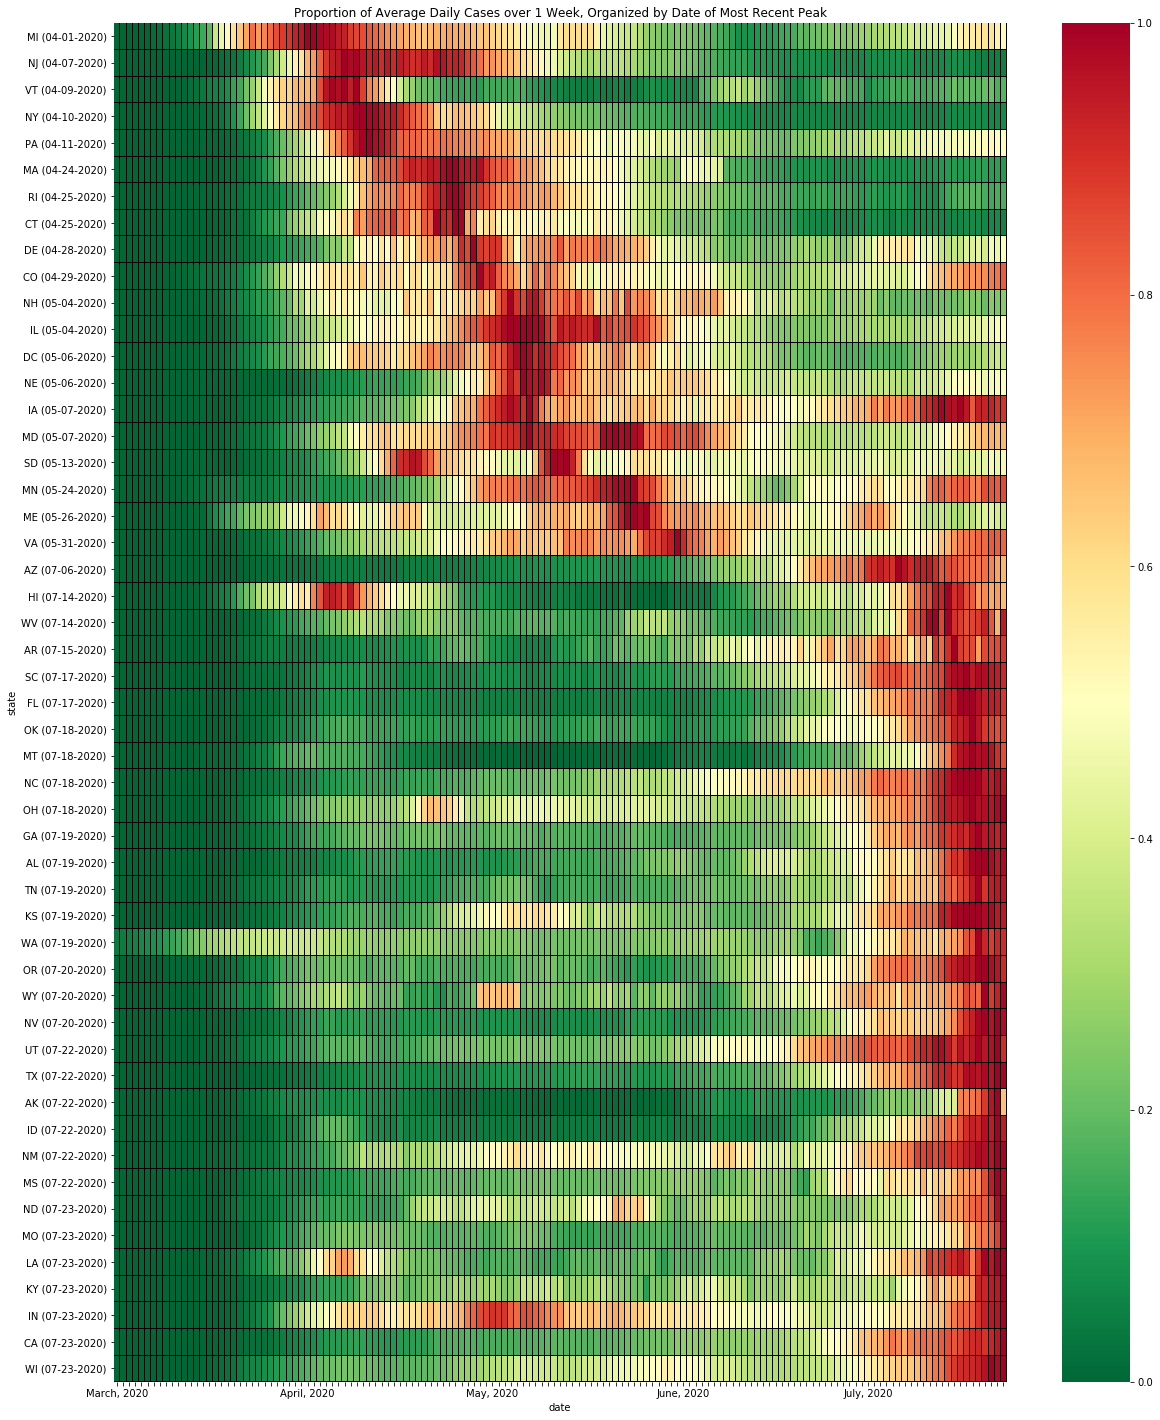

In [108]:
states1 = states.copy()
states1['state'] = states1['state']+' ('+states1['pcd date']+')'
states1.head()

val = recentStates.sort_values(by=['state'])['peak case day'].values

states1 = states1[states1['date'] >= datetime(2020,3,1)]

states_heat = states1.pivot('state', 'date', 'case proportion')
states_heat['peak case day'] = val
states_heat = states_heat.sort_values(by='peak case day')
states_heat = states_heat.drop(['peak case day'], axis=1)
states_heat = states_heat.fillna(0)


dayLabels = states1[states1['fips']==53]['date'][::-1]
dayLabels
lastLabels = []
for day in dayLabels:
    if day.date().day == 1:
        lastLabels.append(day.strftime("%B, %Y"))
#         print(day.date())
    else:
        lastLabels.append('')

lastLabels
fig, ax = plt.subplots(figsize=(20,25))
sns.heatmap(states_heat, cmap='RdYlGn_r', vmin=0, vmax=1, xticklabels=lastLabels, linewidths=.005, linecolor='black')
plt.title('Proportion of Average Daily Cases over 1 Week, Organized by Date of Most Recent Peak')
# plt.xlabel(lastLabels)

fig.savefig('images/Normalized Weekly Average of Daily Cases')

In [74]:
print("Average Cases/State: "+str(stat.mean(recentStates['positive'].values.tolist())))
print("Median Cases/State: "+str(stat.median(recentStates['positive'].values.tolist())))

state_avg = stat.mean(recentStates['positive'].values.tolist())
state_median = stat.median(recentStates['positive'].values.tolist())

Average Cases/State: 78501.09803921569
Median Cases/State: 41698.0


### State Infection

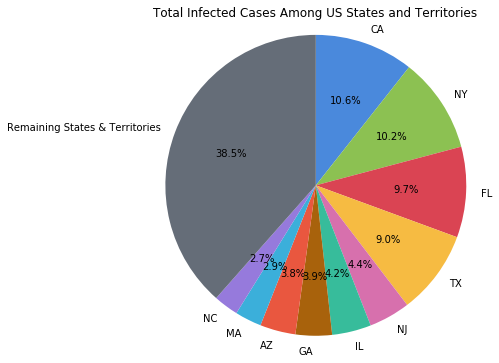

In [75]:
#pie chart
count=0

recentStates = recentStates.sort_values(by='positive', ascending=False)
state_values = recentStates['positive'][:10].values.tolist()
state_labels = recentStates['state'][:10].values.tolist()
rest_states_values = recentStates['positive'][10:].values.tolist()

for c in rest_states_values:
    if math.isnan(c) == False:
        count+=c

state_values.append(count)
state_labels.append("Remaining States & Territories")

plt.pie(state_values, labels=state_labels, startangle=90, counterclock=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Total Infected Cases Among US States and Territories')
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

fig.savefig('images/Infected Cases Among States')

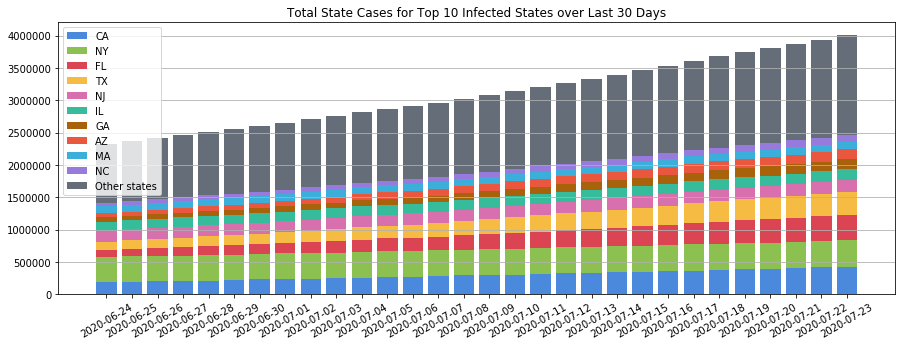

In [76]:
num_charts = 30

#timeline
yeet = np.arange(num_charts)
day_back = 0
d = time - timedelta(days=1)
recent_date = recentStates.index.tolist()[0]

#state labels
recent = states[states['date']==recentStateDate()]
recent = recent.sort_values(by=['positive'], ascending=False)
labels = recent['state'][:10].tolist()

for y in yeet:
    bottom = 0
    values = []
    day = recent_date-timedelta(days=day_back)
    recent = states[states['date']==day]
    
    current_totals = recent[['state', 'positive']]
    for c in labels:
        try:
            temp = current_totals.loc[current_totals['state']==c,['positive']].values[0][0]
        except IndexError:
            temp = 0;
        values.append(temp)

    current_totals = current_totals.sort_values(by=['positive'], ascending=False)
    rest = current_totals[10:].sum(axis = 0, skipna = True)[1]
    count = current_totals[10:].count(axis = 0)[1]
    values.append(rest)
    
    for val in values:
        plt.bar((num_charts-day_back-1), val, bottom=bottom)
        bottom+=val
    day_back +=1

#x-axis labels
dates = []
x_lab = states['date'][:num_charts] #fix xlab
# print(x_lab)
for d in x_lab.tolist():
    dates.append(str(d.date()))
dates.reverse()
plt.xticks(yeet, dates, rotation=30)
plt.title('Total State Cases for Top 10 Infected States over Last '+str(num_charts)+' Days')

#labels
labels.append('Other states')
plt.legend(labels)

fig = plt.gcf()
fig.set_size_inches(15,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Top 10 State Cases Over Previous X Days')

### Per Capita Infections

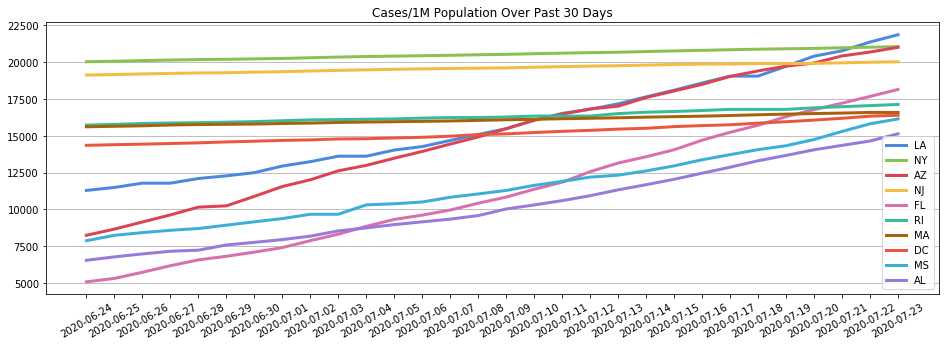

In [77]:
n_days = 30
recentStates = recentStates.sort_values(by=['cases/1M'], ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['cases/1M'].values, label=s, linewidth=3)

#date labels
dates = []
for d in dfState.index.tolist():
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['cases/1M'].values.tolist()[:n_days])

#graph
plt.legend()
plt.title('Cases/1M Population Over Past '+str(n_days)+' Days')
# plt.yscale('log')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/State Cases Per 1M Over Time')

### Per Capita Deaths

/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


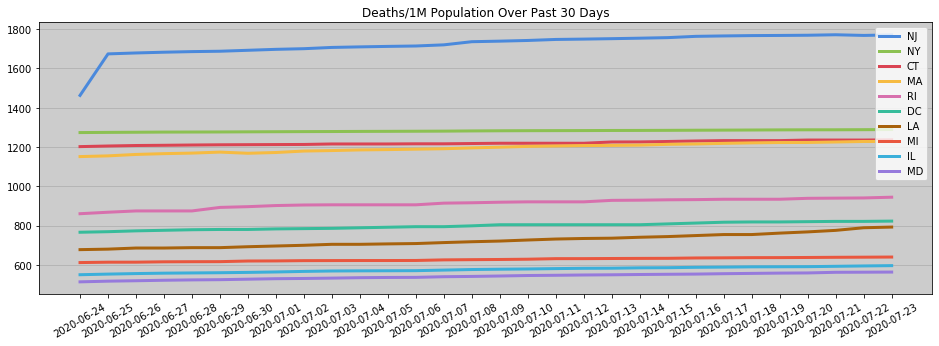

In [78]:
n_days = 30

recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='deaths/1M', ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['deaths/1M'].values, label=s, linewidth=3)

#date labels
dates = []
for d in dfState.index.tolist():
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['deaths/1M'].values.tolist()[:n_days])

#background color
ax = plt.axes()
ax.set_facecolor("0.8")

#graph
plt.legend()
plt.title('Deaths/1M Population Over Past '+str(n_days)+' Days')
# plt.yscale('log')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/State Deaths Per 1M Over Time')

### Positive Testing Rate

In [79]:
pick_state = 'TX'

states.head()
test = states[states['state']==pick_state]
test.shape

(142, 22)

In [80]:
recentStates = states[states['date']==recentStateDate()]

print("Total Tests Given: "+str(np.nansum(recentStates['total'])))
print("Total Positive: "+str(np.nansum(recentStates['positive'])))
print("Total Negative: "+str(np.nansum(recentStates['negative'])))

avg_percent = recentStates.mean(axis=0)
avg_percent = avg_percent['test percent']
txt = "Average Positive Testing Rate: {avg:.3f}%"
print(txt.format(avg = avg_percent))

Total Tests Given: 48552261
Total Positive: 4003556.0
Total Negative: 44545580.0
Average Positive Testing Rate: 7.471%


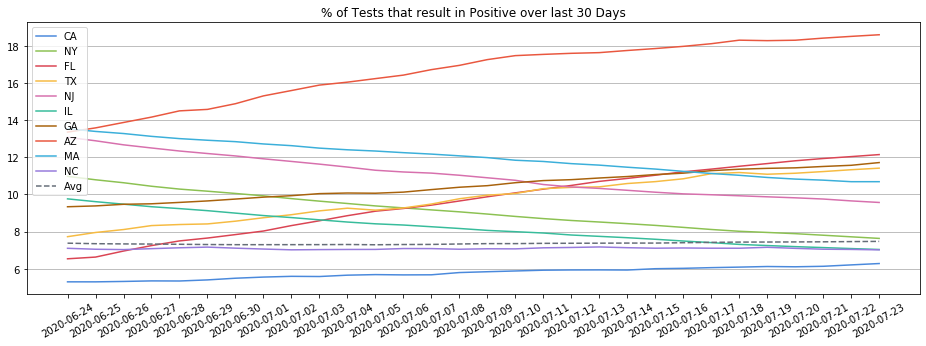

In [81]:
n_days = 30
top = 10

recentStates = states[states['date']==recentStateDate()]
recentStates = recentStates.sort_values(by='positive', ascending=False)

stateList = states['state'].value_counts().index.tolist()
top_stateList = recentStates[:10]
stateInterest = top_stateList['state'].values.tolist()

for s in stateInterest:
    dfState = states[states['state']==s][:n_days]
    dfState.set_index('date', inplace=True)
    dfState = dfState.iloc[::-1]
    plt.plot(dfState['test percent'].values, label=s)

#date labels
dates = []
for d in dfState.index.tolist()[:n_days]:
    dates.append(str(d.date()))
    
dfState = states[states['state']=='NY']
days = len(dfState['positive'].values.tolist()[:n_days])

#average for each day (create a variable for each day and then plot it like the rest)
avgs = []
for d in dfState['date'].tolist()[:n_days]:
    df_2 = states[states['date']==d]
    datastream = df_2['test percent']
    avg = stat.mean(datastream)
    avgs.append(avg)

avgs = avgs[::-1]
plt.plot(avgs, '--', label="Avg")

#graph
plt.legend(loc='upper left')
plt.title('% of Tests that result in Positive over last '+str(n_days)+' Days')
plt.xticks(np.arange(days), dates, rotation=30)  # Set text labels
fig = plt.gcf()
fig.set_size_inches(16,5)
plt.grid(axis='y')
plt.show()

fig.savefig('images/Percent Positive Testing In US States')

In [82]:
states.head()

,date,fips,state,population,positive,negative,total,death,positiveIncrease,deathIncrease,...,cases/1M,deaths/1M,weekly case avg,weekly death avg,case proportion,death proportion,peak case day,weekly case/1M pop,weekly death/1M pop,pcd date
0,2020-07-23,2,AK,731545,2684.0,186825.0,189509,19.0,65,0,...,3668.947228,25.972428,93.142857,0.285714,0.659919,0.50,2020-07-22,127.323483,0.390563,07-22-2020
1,2020-07-22,2,AK,731545,2619.0,182714.0,185333,19.0,94,1,...,3580.094184,25.972428,141.142857,0.285714,1.000000,0.50,2020-07-22,192.938038,0.390563,07-22-2020
2,2020-07-21,2,AK,731545,2525.0,176101.0,178626,18.0,111,0,...,3451.599013,24.605458,135.142857,0.142857,0.957490,0.25,2020-07-22,184.736219,0.195281,07-22-2020
3,2020-07-20,2,AK,731545,2414.0,173172.0,175586,18.0,137,0,...,3299.865353,24.605458,125.000000,0.142857,0.885628,0.25,2020-07-22,170.871238,0.195281,07-22-2020
4,2020-07-19,2,AK,731545,2277.0,170733.0,173010,18.0,118,0,...,3112.590476,24.605458,114.000000,0.142857,0.807692,0.25,2020-07-22,155.834569,0.195281,07-22-2020


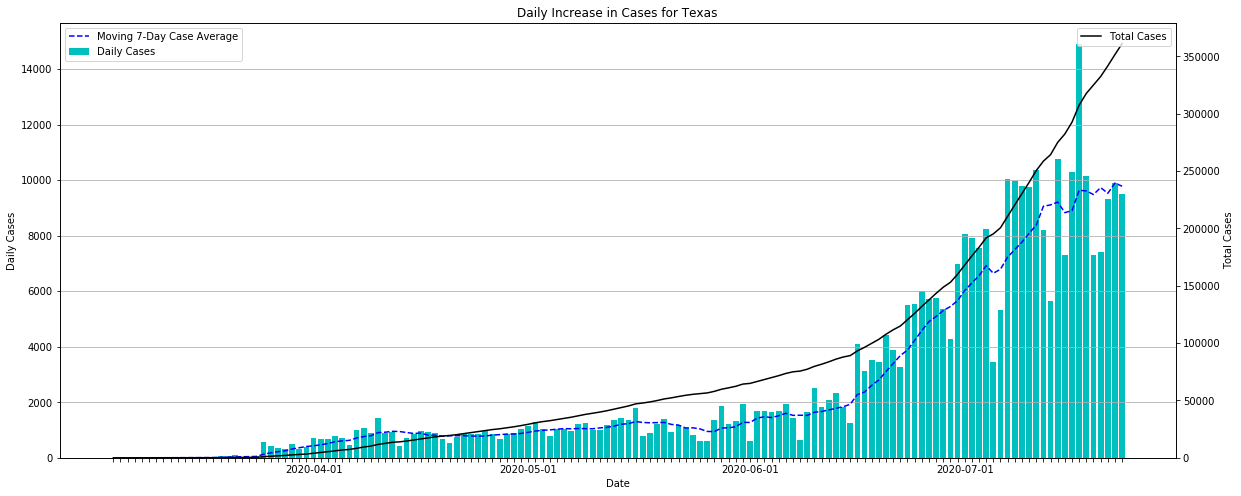

In [83]:
#updates the charts for all 50 states + DC

temp_df = states[states['state']=='TX'].reset_index(drop=True)
temp_df = temp_df.sort_values(by='date')

#date labels
dates = []
for d in temp_df['date'].tolist():
    if d.day==1: dates.append(str(d.date()))
    else: dates.append('')

x_val = np.arange(len(temp_df['date']))

#plotting
fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Cases')
ax1.bar(x=x_val, bottom=0, height=temp_df['positiveIncrease'], label='Daily Cases', color='c')
ax1.plot(x_val, temp_df['weekly case avg'],  label='Moving 7-Day Case Average', color='b', linestyle='dashed')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Total Cases')
ax2.plot(x_val, temp_df['positive'],  label='Total Cases', color='k')
# ax2.plot(x_val, temp_df['weekly death avg'],  label='Running Average', color='k', linestyle='dashed')

plt.title('Daily Increase in Cases for Texas')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(x_val, dates, rotation=30) 
fig = plt.gcf()
ax1.grid(axis='y')

plt.ylim(0)

plt.show()
fig.savefig('images/Texas Cases')

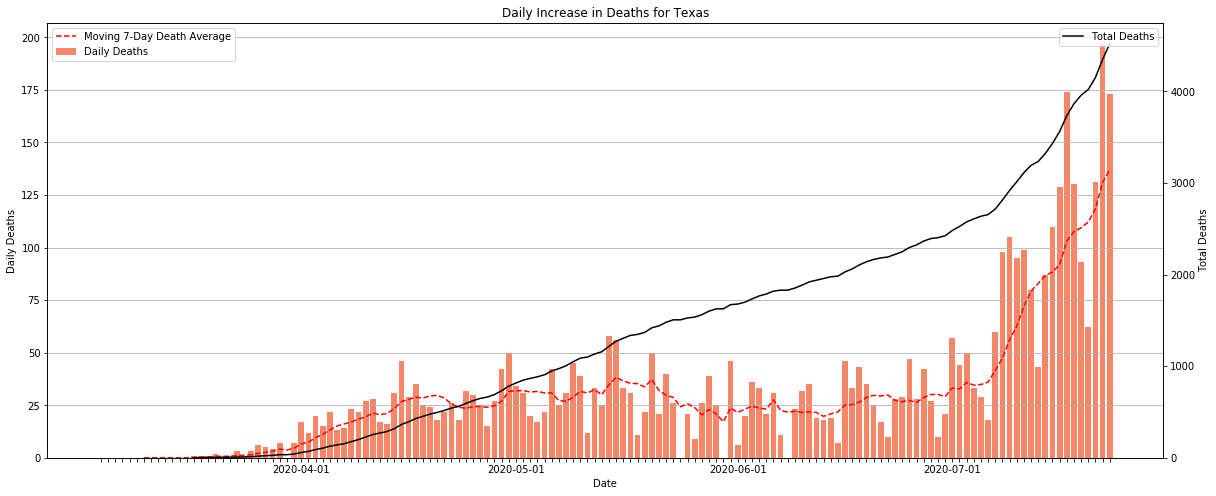

In [84]:
#updates the charts for all 50 states + DC

temp_df = states[states['state']=='TX'].reset_index(drop=True)
temp_df = temp_df.sort_values(by='date')

#date labels
dates = []
for d in temp_df['date'].tolist():
    if d.day==1: dates.append(str(d.date()))
    else: dates.append('')

x_val = np.arange(len(temp_df['date']))

#plotting
fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Deaths')
ax1.bar(x=x_val, bottom=0, height=temp_df['deathIncrease'], label='Daily Deaths', color='#f58667')
ax1.plot(x_val, temp_df['weekly death avg'],  label='Moving 7-Day Death Average', color='r', linestyle='dashed')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Total Deaths')
ax2.plot(x_val, temp_df['death'],  label='Total Deaths', color='k')

plt.title('Daily Increase in Deaths for Texas')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(x_val, dates, rotation=30) 
fig = plt.gcf()
ax1.grid(axis='y')

plt.ylim(0)

plt.show()
fig.savefig('images/Texas Deaths')

In [85]:
#updates the charts for all 50 states + DC
list1 = ['TX']
for s in stateList:
    temp_state = states[states['state']==s].reset_index(drop=True)
    temp_state = temp_state.sort_values(by='date')
    
    #date labels
    dates = []
    for d in temp_state['date'].tolist():
        if d.day==1: dates.append(str(d.date()))
        else: dates.append('')

    x_val = np.arange(len(temp_state['fips']))
    
    #plotting
    fig, ax1 = plt.subplots(figsize=(16,6))
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases and Tests')
    ax1.bar(x=x_val, bottom=0, height=temp_state['totalTestResultsIncrease'], label='Test Results Increase')
    ax1.bar(x=x_val, bottom=0, height=temp_state['positiveIncrease'], label='Positive Cases Increase', color='r')
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('% of Tests Returned Positive')
    ax2.plot(x_val, temp_state['test percent'],  label='Testing Percent', color='k', linestyle='dashed')
    
    plt.title('Daily Increase in Cases and Tests for '+s)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.xticks(x_val, dates, rotation=30) 
    fig = plt.gcf()
    ax1.grid(axis='y')
    fig.show(False)
    fig.savefig('state testing/'+s)
    plt.close() #prevent the charts from showing in notebook

In [86]:
#updates the charts for all 50 states + DC
list1 = ['TX']
for s in stateList:
    temp_state = states[states['state']==s].reset_index(drop=True)
    temp_state = temp_state.sort_values(by='date')
    
    #date labels
    dates = []
    for d in temp_state['date'].tolist():
        if d.day==1: dates.append(str(d.date()))
        else: dates.append('')

    x_val = np.arange(len(temp_state['fips']))
    
    #plotting
    fig, ax1 = plt.subplots(figsize=(16,6))
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases')
    ax1.bar(x=x_val, bottom=0, height=temp_state['positiveIncrease'], label='Positive Cases Increase', color='c')
    ax1.plot(x_val, temp_state['weekly case avg'], color='b', linestyle='dashed', label='Moving 7-Day Average')
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Total Cases')
    ax2.plot(x_val, temp_state['positive'],  label='Total Cases', color='k')
    
    plt.title('Daily Increase in Cases for '+s)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.xticks(x_val, dates, rotation=30) 
    
    #set total cases axis to 0
    bottom, top = ax2.get_ylim()  # return the current ylim
    ax2.set_ylim([0, top])

    fig = plt.gcf()
    ax1.grid(axis='y')
    fig.show(False)
    fig.savefig('states/'+s)
    plt.close() #prevent the charts from showing in notebook

In [87]:
#show running cases and deaths for all countries with more than 10,000 total cases (66 as of 6/27)
countries1 = df[df['Total Cases']>=10000]['countriesAndTerritories'].unique().tolist()

for c in countries1:
    temp_df = df[df['countriesAndTerritories']==c].reset_index(drop=True)
    temp_df = temp_df.sort_values(by='dateRep')

    #date labels
    dates = []
    for d in temp_df['dateRep'].tolist():
        if d.day==1: dates.append(str(d.date()))
        else: dates.append('')

    x_val = np.arange(len(temp_df['dateRep']))

    #plotting
    fig, ax1 = plt.subplots(figsize=(20,8))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases')
    ax1.bar(x=x_val, bottom=0, height=temp_df['cases'], label='Daily Cases', color='c')
    ax1.plot(x_val, temp_df['weekly case avg'],  label='Moving 7-Day Case Average', color='b', linestyle='dashed')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Total Cases and Deaths')
    ax2.plot(x_val, temp_df['Total Cases'], label='Total Cases', color='k')

    plt.title('Daily Increase in Cases for '+c)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.xticks(x_val, dates, rotation=30) 
    
    #set total cases axis to 0
    bottom, top = ax1.get_ylim()  # return the current ylim
    ax1.set_ylim([0, top])
    
    #set total cases axis to 0
    bottom, top = ax2.get_ylim()  # return the current ylim
    ax2.set_ylim([0, top])
    
    fig = plt.gcf()
    ax1.grid(axis='y')
    fig.show(False)
    fig.savefig('nation/'+c)
    plt.close() #prevent the charts from showing in notebook

# Counties

In [88]:
def mdy(date):
    month = date.month
    if(month<10): month = '0'+str(month)
    
    day = date.day
    if(day<10): day = '0'+str(day)
        
    year = date.year
    
    return str(month)+'-'+str(day)+'-'+str(year)

In [89]:
def daysBack(date, days):
    return date-timedelta(days=days)

In [90]:
def daysForward(date, days):
    return date+timedelta(days=days)

In [91]:
current_day = mdy(datetime.now())
prev_day = mdy(daysBack(datetime.now(), 1))
current_day

'07-24-2020'

In [92]:
try:
    county_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+current_day+'.csv',
                         parse_dates=['Last_Update'],
                         dtype={'FIPS': str})
except:
    print("WARNING, Data has not been updated...")
    county_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+prev_day+'.csv',
                         parse_dates=['Last_Update'],
                         dtype={'FIPS': str})

adjFip = []
for fip in county_data['FIPS']:
    if isinstance(fip, float) == False:
        if len(fip)==4: 
            fip = '0'+fip
    adjFip.append(fip)
county_data['FIPS']=adjFip

url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv'
county_pop = pd.read_csv(url, encoding='ISO-8859-1',
                        dtype={"STATE": str,
                              "COUNTY": str})

countyInfo = county_pop[['STATE', 'COUNTY', 'POPESTIMATE2019', 'STNAME', 'CTYNAME']]
countyInfo['FIPS'] = countyInfo['STATE']+countyInfo['COUNTY']
county_data = pd.merge(county_data, countyInfo, on='FIPS')

county_data['Cases/1k Pop']=county_data['Confirmed']/county_data['POPESTIMATE2019']*1000
county_data['Deaths/1k Pop']=county_data['Deaths']/county_data['POPESTIMATE2019']*1000
county_data['Deaths/Case']=county_data['Deaths']/county_data['Confirmed']

county_data = county_data.dropna()
print(county_data['Last_Update'].tolist()[0])
county_data = county_data.drop(['STATE', 'COUNTY', 'Lat', 'Long_', 'Country_Region', 'STNAME', 'CTYNAME', 'Combined_Key', 'Last_Update', 'Case-Fatality_Ratio', 'Incidence_Rate'], axis=1)

WARNING, Data has not been updated...
2020-07-24 05:30:40


/Users/carterpace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Top 10 Counties by Total Cases

In [93]:
county_data = county_data.sort_values(by='Confirmed', ascending=False)
county_data = county_data.reset_index(drop=True)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,222832,23463,0,199369.0,1628706,136.815361,14.405915,0.105295
1,06037,Los Angeles,California,166868,4263,0,162605.0,10039107,16.621797,0.424639,0.025547
2,04013,Maricopa,Arizona,102247,1651,0,100596.0,4485414,22.795443,0.368082,0.016147
3,17031,Cook,Illinois,100795,4810,0,95985.0,5150233,19.570959,0.933938,0.047721
4,12086,Miami-Dade,Florida,95068,1354,0,93714.0,2716940,34.990835,0.498355,0.014242
5,48201,Harris,Texas,61411,597,0,60814.0,4713325,13.029231,0.126662,0.009721
6,12011,Broward,Florida,45010,536,0,44474.0,1952778,23.049215,0.274481,0.011908
7,48113,Dallas,Texas,44087,579,0,43508.0,2635516,16.728034,0.219691,0.013133
8,36059,Nassau,New York,42816,2193,0,40623.0,1356924,31.553720,1.616155,0.051219
9,36103,Suffolk,New York,42715,1995,0,40720.0,1476601,28.927923,1.351076,0.046705


## Top 10 Counties by Total Deaths

In [94]:
county_data = county_data.sort_values(by='Deaths', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,222832,23463,0,199369.0,1628706,136.815361,14.405915,0.105295
3,17031,Cook,Illinois,100795,4810,0,95985.0,5150233,19.570959,0.933938,0.047721
1,06037,Los Angeles,California,166868,4263,0,162605.0,10039107,16.621797,0.424639,0.025547
18,26163,Wayne,Michigan,25649,2788,0,22861.0,1749343,14.662076,1.593741,0.108698
8,36059,Nassau,New York,42816,2193,0,40623.0,1356924,31.553720,1.616155,0.051219
28,34013,Essex,New Jersey,19198,2094,0,17104.0,798975,24.028286,2.620858,0.109074
26,34003,Bergen,New Jersey,20133,2034,0,18099.0,932202,21.597250,2.181931,0.101028
9,36103,Suffolk,New York,42715,1995,0,40720.0,1476601,28.927923,1.351076,0.046705
22,25017,Middlesex,Massachusetts,25123,1951,0,23172.0,1611699,15.587898,1.210524,0.077658
15,42101,Philadelphia,Pennsylvania,29102,1675,0,27427.0,1584064,18.371732,1.057407,0.057556


## Top 10 Counties by Cases/1k Population

In [95]:
county_data = county_data.sort_values(by='Cases/1k Pop', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
379,47169,Trousdale,Tennessee,1556,6,0,1550.0,11284,137.894364,0.531726,0.003856
0,36061,New York City,New York,222832,23463,0,199369.0,1628706,136.815361,14.405915,0.105295
676,47095,Lake,Tennessee,703,0,0,703.0,7016,100.199544,0.000000,0.000000
587,05077,Lee,Arkansas,868,6,0,862.0,8857,98.001581,0.677430,0.006912
338,31043,Dakota,Nebraska,1880,38,0,1842.0,20026,93.877959,1.897533,0.020213
351,19021,Buena Vista,Iowa,1767,12,0,1755.0,19620,90.061162,0.611621,0.006791
484,05079,Lincoln,Arkansas,1138,11,0,1127.0,13024,87.377150,0.844595,0.009666
358,27105,Nobles,Minnesota,1714,6,0,1708.0,21629,79.245457,0.277405,0.003501
866,22035,East Carroll,Louisiana,482,1,0,481.0,6861,70.252150,0.145751,0.002075
692,31037,Colfax,Nebraska,685,4,0,681.0,10709,63.964889,0.373518,0.005839


## Top 10 Counties by Deaths/1k Population

In [96]:
county_data = county_data.sort_values(by='Deaths/1k Pop', ascending=False)
county_data.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,222832,23463,0,199369.0,1628706,136.815361,14.405915,0.105295
1235,13141,Hancock,Georgia,249,33,0,216.0,8457,29.443065,3.902093,0.132530
1283,13243,Randolph,Georgia,230,26,0,204.0,6778,33.933314,3.835940,0.113043
1181,13273,Terrell,Georgia,271,29,0,242.0,8531,31.766499,3.399367,0.107011
1049,13099,Early,Georgia,337,31,0,306.0,10190,33.071639,3.042198,0.091988
196,35031,McKinley,New Mexico,3844,209,0,3635.0,71367,53.862429,2.928524,0.054370
488,28099,Neshoba,Mississippi,1130,82,0,1048.0,29118,38.807610,2.816127,0.072566
1525,51595,Emporia,Virginia,156,15,0,141.0,5346,29.180696,2.805836,0.096154
28,34013,Essex,New Jersey,19198,2094,0,17104.0,798975,24.028286,2.620858,0.109074
680,28051,Holmes,Mississippi,697,43,0,654.0,17010,40.975897,2.527925,0.061693


## State Top Counties

In [97]:
pick= 'Texas'

temp_df = county_data[county_data['Province_State']==pick]
temp_df = temp_df.sort_values(by='Confirmed', ascending=False)
temp_df.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
5,48201,Harris,Texas,61411,597,0,60814.0,4713325,13.029231,0.126662,0.009721
7,48113,Dallas,Texas,44087,579,0,43508.0,2635516,16.728034,0.219691,0.013133
11,48029,Bexar,Texas,34663,298,0,34365.0,2003554,17.300757,0.148736,0.008597
23,48439,Tarrant,Texas,23967,319,0,23648.0,2102515,11.399205,0.151723,0.013310
29,48453,Travis,Texas,18696,222,0,18474.0,1273954,14.675569,0.174261,0.011874
52,48215,Hidalgo,Texas,13776,400,0,13376.0,868707,15.858051,0.460454,0.029036
59,48141,El Paso,Texas,12501,211,0,12290.0,839238,14.895655,0.251419,0.016879
73,48355,Nueces,Texas,9961,124,0,9837.0,362294,27.494245,0.342263,0.012449
108,48167,Galveston,Texas,7794,68,0,7726.0,342139,22.780215,0.198750,0.008725
117,48061,Cameron,Texas,6854,137,0,6717.0,423163,16.197068,0.323752,0.019988


In [98]:
print("TOTAL CONFIRMED: "+str(county_data['Confirmed'].sum()))
print("TOTAL DEATHS   : "+str(county_data['Deaths'].sum()))
print("CASE DEATH RATE: "+str(county_data['Deaths'].sum()/county_data['Confirmed'].sum()))
print("------------")

confirmed = county_data['Confirmed'].values.tolist()
print("Average Cases/County: "+str(stat.mean(confirmed)))
print("Median Cases/County: "+str(stat.median(confirmed)))
print("------------")

dead = county_data['Deaths'].values.tolist()
print("Average Deaths/County: "+str(stat.mean(dead)))
print("Median Deaths/County: "+str(stat.median(dead)))
print("------------")

datastream = county_data['Cases/1k Pop'].values.tolist()
print("Average Cases/1k: "+str(stat.mean(datastream)))
print("Median Median/1k: "+str(stat.median(datastream)))
print("------------")

datastream = county_data['Deaths/1k Pop'].values.tolist()
print("Average Deaths/1k: "+str(stat.mean(datastream)))
print("Median Deaths/1k: "+str(stat.median(datastream)))
print("------------")

datastream = county_data['Deaths/Case'].values.tolist()
print("Average Deaths/Case: "+str(stat.mean(datastream)))
print("Median Deaths/Case: "+str(stat.median(datastream)))
print("------------")

TOTAL CONFIRMED: 3979446
TOTAL DEATHS   : 142316
CASE DEATH RATE: 0.035762766978117054
------------
Average Cases/County: 1293.2876178095548
Median Cases/County: 153
------------
Average Deaths/County: 46.251543711407216
Median Deaths/County: 2
------------
Average Cases/1k: 8.384975086670625
Median Median/1k: 5.396986772515385
------------
Average Deaths/1k: 0.21441934458065434
Median Deaths/1k: 0.07574609907589759
------------
Average Deaths/Case: 0.02231953033517909
Median Deaths/Case: 0.012195121951219513
------------


## Filtered Stats
Showing the per capita rates for counties over a certain threshold, to prevent small counties with only a few infections showing up in the top list. 

In [99]:
filtered = county_data.sort_values(by='Cases/1k Pop', ascending=False)
filtered = filtered[filtered['Confirmed']>=1000]
filtered.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
379,47169,Trousdale,Tennessee,1556,6,0,1550.0,11284,137.894364,0.531726,0.003856
0,36061,New York City,New York,222832,23463,0,199369.0,1628706,136.815361,14.405915,0.105295
338,31043,Dakota,Nebraska,1880,38,0,1842.0,20026,93.877959,1.897533,0.020213
351,19021,Buena Vista,Iowa,1767,12,0,1755.0,19620,90.061162,0.611621,0.006791
484,05079,Lincoln,Arkansas,1138,11,0,1127.0,13024,87.377150,0.844595,0.009666
358,27105,Nobles,Minnesota,1714,6,0,1708.0,21629,79.245457,0.277405,0.003501
329,20057,Ford,Kansas,1994,8,0,1986.0,33619,59.311699,0.237961,0.004012
196,35031,McKinley,New Mexico,3844,209,0,3635.0,71367,53.862429,2.928524,0.054370
479,20175,Seward,Kansas,1149,4,0,1145.0,21428,53.621430,0.186672,0.003481
286,04023,Santa Cruz,Arizona,2424,44,0,2380.0,46498,52.131274,0.946277,0.018152


In [100]:
filtered = county_data.sort_values(by='Deaths/1k Pop', ascending=False)
filtered = filtered[filtered['Deaths']>=100]
filtered.head(10)

,FIPS,Admin2,Province_State,Confirmed,Deaths,Recovered,Active,POPESTIMATE2019,Cases/1k Pop,Deaths/1k Pop,Deaths/Case
0,36061,New York City,New York,222832,23463,0,199369.0,1628706,136.815361,14.405915,0.105295
196,35031,McKinley,New Mexico,3844,209,0,3635.0,71367,53.862429,2.928524,0.054370
28,34013,Essex,New Jersey,19198,2094,0,17104.0,798975,24.028286,2.620858,0.109074
35,34031,Passaic,New Jersey,17214,1238,0,15976.0,501826,34.302726,2.466991,0.071918
41,34039,Union,New Jersey,16297,1343,0,14954.0,556341,29.293185,2.413987,0.082408
27,34017,Hudson,New Jersey,19289,1494,0,17795.0,672391,28.687178,2.221921,0.077453
26,34003,Bergen,New Jersey,20133,2034,0,18099.0,932202,21.597250,2.181931,0.101028
51,36087,Rockland,New York,13820,673,0,13147.0,325789,42.420094,2.065754,0.048698
288,13095,Dougherty,Georgia,2411,159,0,2252.0,87956,27.411433,1.807722,0.065948
32,34023,Middlesex,New Jersey,17442,1396,0,16046.0,825062,21.140229,1.691994,0.080037


# Analysis and Notes
- (4/12/20) Big spike in small Georgia counties like Daughtry and Randolph due to a funeral where one of the attendees had the virus, after ignoring stay at home warnings
    - https://www.nytimes.com/2020/03/30/us/coronavirus-funeral-albany-georgia.html
- (4/15/20) infection at a meat packaging plant in Iowa results in rapid spreading of virus, faster than in NYC
    - https://www.iowapublicradio.org/post/coronavirus-surges-louisa-county-following-outbreak-meat-processing-plant#stream/0
- (4/16/20) Belgium numbers are higher than other countries because they are counting "potential" deaths by corona, just just confirmed 
    - https://www.wsj.com/articles/as-virus-death-tolls-rise-world-wide-belgium-considers-adjusting-its-down-11587059597?emailToken=44cf96739b5dcf3f26410cf2a1e166a0fMDPag6kMmvXqkvgQOj+c3QHTtBV1wt1bro8+4pdbmf3Q9Bq+Z9tBwewoll5PSXu8kmCDy5JhnkqaAuFzr957dX5iZF4a2eIrRkXtlL371llCZNaxEIL4ASeTVAtQExtvmt8w4XijBpepC8NuGsWKw%3D%3D&reflink=article_imessage_sharecart
- (4/19/20) Marion County Ohio became the third highest per capita county after a jail in the county reported over 1000 cases 
    - https://www.10tv.com/article/prison-covid-19-cases-puts-marion-county-more-confirmed-cases-any-other-ohio-county-2020-apr
- (4/24/20) Lincoln County Arkansas Prison reports hundreds of cases, making it the second highest per capita infection county
    - https://www.themarshallproject.org/2020/04/24/these-prisons-are-doing-mass-testing-for-covid-19-and-finding-mass-infections
- (4/26/20) Bledsoe County Tennessee prison reports hundreds of cases, making it the third highest per capita infection county
    - https://wdef.com/2020/04/24/bledsoe-prison-warping-covid-19-case-stats-county/
- (4/26/20) Error in Spain's data is causing them to report 0 total cases by today. There is no explanation for why this is
- (4/27/20) Spains data as of today contains negative cases for the date of 4/19 (-1400). There is no explanation for why this is
- (5/1/20) Spains data continues to disrupt the graphs and visualizations. There is now no reported data for April 30th, and is causing a gap
- (5/4/20) Trousdale County Tennessee jumps to highest infection per capita due to 1200 cases at a prison
    - https://www.wsmv.com/news/over-1-200-staff-inmates-test-positive-for-covid-19-at-trousdale-turner-correctional-center/article_568c03d2-8bde-11ea-a447-4b7eaabeb67b.html
- (5/4/20) Spain data update: the missing value is now for May 2, still resulting in a gap 2 days prior to current data
- (5/17/20) Fixed the Spain missing data issue by duplicating its most recent data and adding it as the current date. Chose to duplicate instead of add as 0's to maintain roughly the same percent increase for maps and graphs
- (6/19/20) Added heat maps to show average daily cases for State and National level data, on a moving 7-day average


In [101]:
print('Done')

Done
